# Churn Prediction and Lifetime Value Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Split data set into X, y](#Split data set into X, y)
  - [Split data set into training and evaluation]
  - [Feature Engineering (Creating New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, 
        Normalization, Scaling)]
    - [Create a pipeline to preprocess the data]
      - [Separate inpute features into numeric and categorical for different pipelines]
      - [Handle missing values using imputation Techniques]
      - [Scaling or normalize numeric features]
      - [Encode categorical features]
      - [Transformations for skewed data (log, power, custom, etc)]
      - [Balance dataset (depending on what you see)]
- [Step 4: Modeling]
  - [Fit data to the pipeline and train Model]
    - [Train Model 1 - Distance based model]
    - [Train Model 2 - Gradient Descent model]
    - [Train Model 3 - Tree based model]
    - [Train Model 4 - Neural Network]


<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

##### **Project Background:** In the ever-evolving telecommunication sector, retaining customers and accurately forecasting churn is essential for sustaining growth and profitability. This project seeks to harness advanced classification models to deliver a thorough understanding of customer behaviour for a prominent telecommunication company.

##### **Project Objective:** The project will focus on two areas:
- Churn Prediction: The project will develop and implement machine learning models to predict which customers are likely to leave the network by examining the various customer     metrics and behaviours to uncover the primary reasons behind churn, allowing for strategic improvements in customer service and satisfaction.

- Customer Lifetime Value: Attempt the estimation of the lifetime value of each customer which has the potential to provide actionable insights into the long-term revenue each 
    customer brings. 
    This analysis will help prioritize efforts on high-value customers and inform targeted marketing and retention initiatives.

Through this initiative, the telecommunication company will gain a deeper, data-driven understanding of its customer base, enabling more effective decision-making to enhance customer loyalty and drive sustained business success.
 
##### **Stakeholders:**
- Telecommunication provider

##### **Key metrics and success Criteria:**
- Model should have accuracy scores of 85% (on balance data)
- Good models are expected to have an F1 score of > 80%
- An ROC Curve of 80% is ideal for the model to generalise well
- There should be a minimum of 4 Baseline models
- All hyperparameter tuning should only be applied to the Baseline models if they exceed their F1 score


##### **Features/Columns:**
- customerID
- gender: Whether the customer has a partner or not (Yes, No)
- SeniorCitizen: Whether a customer is a senior citizen or not
- Partner
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure:  Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract: The contract term of the customer (Month-to-Month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn

##### **Hypothesis:** 

**B. Null Hypothesis (H<sub>0</sub>):**
There is no statistical significant relationship between churn rate and the contract term of the customer

**C. Alternative Hypothesis (H<sub>1</sub>):**
There is a statistical significance relationship between churn rate and the contract term of the customer

##### **Key Business Questions:**
- What is the churn rate for customers with only Phone_service

   Understanding the churn rate among customers with only phone service can help identify if this specific segment is more prone to leaving compared to customers with other or additional services
- Does the type of contract affect the rate of churn?

  Different contract types may have different churn rates due to the varying levels of commitment required from the customer

- How does the customer payment_method vary with the churn rate?

  Certain payment methods might be more convenient or reliable for customers, potentially influencing their decision to stay or leave

- Is churn affected by the presence of partner or dependents?

  The presence of a partner or dependents might influence a customer’s stability and satisfaction with the service, impacting churn


[Back to Top](#Table-of-Contents)
## Step 2: Data Understanding

`Project Initialization`

`Data Collection`

`EDA & Data Cleaning`

Inspect the dataset in depth, visualise it to answer analytical questions and plan the cleaning, processing and feature creation.

**A. Data Quality Assessment & Exploring the data (info, duplicates, null values, describe etc.)**
- Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times.
- Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of customer churns or other extraneous information
- Combine dataframes into a single dataframe if necessary

**B. Univariate Analysis:**
Explore, analyze and visualize key variables independently of others

**C. Bivariate Analysis:**
Explore, analyze and visualize the relationship variables pairs of different dimensions

**D. Multivariate Analysis:**
Explore, analyze and visualize the relationship among variables

**E. Answer Analytical Questions & deploy their visualisations to Power Bi:**

**F. Test Hypothesis:**

**G. Provide insights:**


### Project Initialisation

In [1]:
# Importing necessary libraries

# Environment variables management
from dotenv import dotenv_values

# Database connection
import pyodbc
import MySQLdb
import mysql.connector
import pymysql

# Data handling
import pandas as pd
import numpy as np

# Data handling and utilities
import re
import calendar
import warnings

# Data fetching
import requests

# Statistical analysis
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Data imputation
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Feature Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, FunctionTransformer, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix


# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import catboost as cb
import lightgbm as lgb
import xgboost as xgb

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# set theme
sns.set_theme(style="white", palette="pastel", font="sans-serif", font_scale=1.5)
plt.style.use("default")
custom_palette = ["cyan", "magenta", "yellow"]

# Other packages
import os
import pickle

import joblib


### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

#### Access the LP2_Telco_churn_first_3000 from Microsoft SQL Server
Connect to the database using provided credentials

In [2]:
# load environment variables from.env file into dictionary
environment_variables = dotenv_values("LP2_DAP.env")

# get the values for the environment variables
server = environment_variables.get("server")
login = environment_variables.get("login")
password = environment_variables.get("password")
database = environment_variables.get("database")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"
#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful:", connection_string)    
except Exception as e:
    print("Connection failed:", e)

Connection successful: DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


##### Fetch Information Schema for tables in the database

In [3]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA                  TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP2_Telco_churn_first_3000  BASE TABLE


##### Load LP2_Telco_churn_first_3000 Data

In [4]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM LP2_Telco_churn_first_3000        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df_3000 = pd.read_sql(db_query, connection)

# Display the DataFrame
df_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Access the LP2_Telco-churn-second-2000 data from GitHub Repository

In [5]:
# URL of the file to download
url = "https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv"

# Local file path where the file will be saved
local_file_path = '../Data/Telco-churn-second-2000.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content of the response to the specified file path
    with open(local_file_path, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# Read the downloaded CSV file into a DataFrame
df_2000 = pd.read_csv(local_file_path)

# Display the DataFrame
df_2000.head()    

File downloaded successfully


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Access Telco-churn-last-2000 data from OneDrive

project_root/
├── notebook.ipynb
└── data/
    └── Telco-churn-last-2000.xlsx

C:/Users/wolak/Documents/DSC Accelerator/Machine-Learning-Prediction-Model-for-a-Telecommunications-Provider/data/Telco-churn-last-2000.xlsx

In [6]:
# Path of Excel file
file_path = '../Data/Telco-churn-last-2000.xlsx'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_test = pd.read_excel(file_path)
        
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")

# # Display the DataFrame
df_test.head()

File exists at the specified path.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### **Exploratory Data Analysis (EDA)**

#### A. Data Quality Assessment & Data exploration

In [7]:
# Check the datatype and the number of columns
df_3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
# Check the datatype and the number of columns
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [9]:
# Print column names of all Dataframes
print("Column names of LP2_Telco_churn_first_3000 dataframe:")
print(df_3000.columns)

print("\nColumn names LP2_Telco-churn-second-2000 dataframe:")
print(df_2000.columns)

print("\nColumn names Telco-churn-last-2000 dataframe:")
print(df_test.columns)

Column names of LP2_Telco_churn_first_3000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names LP2_Telco-churn-second-2000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names Telco-churn-last-2000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'ten

In [10]:
# Check shape of the dataframes

print("Number of columns in LP2_Telco_churn_first_3000 dataframe:", df_3000.shape[1])
print("Number of columns in LP2_Telco-churn-second-2000 dataframe:", df_2000.shape[1])
print("Number of columns in 2Telco-churn-last-2000 dataframe:", df_test.shape[1])

Number of columns in LP2_Telco_churn_first_3000 dataframe: 21
Number of columns in LP2_Telco-churn-second-2000 dataframe: 21
Number of columns in 2Telco-churn-last-2000 dataframe: 20


In [11]:
# Combine the df_3000 and df_2000 based on their similarities into a single dataframe
df_train = pd.concat([df_3000, df_2000], ignore_index=True)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
# Create a copy of the original DataFrame to preserve the original data
df_train_eda = df_train.copy()


In [13]:
# Convert the TotalCharges column to float and SeniorCitizen back to booleans
df_train_eda['TotalCharges'] = pd.to_numeric(df_train_eda['TotalCharges'], errors='coerce')

df_train_eda['SeniorCitizen'] = df_train_eda['SeniorCitizen'].astype('bool')
df_train_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [14]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows = df_train_eda[df_train_eda.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in df_train dataset:")
print()
print(missing_percentage)
print("\nNumber of duplicated rows in df_train dataset:", duplicate_count)
print("\nDuplicated rows in the df_train dataset:")
duplicated_rows

Proportion of missing values in df_train dataset:

customerID           0.00
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        5.33
InternetService      0.00
OnlineSecurity      12.91
OnlineBackup        12.91
DeviceProtection    12.91
TechSupport         12.91
StreamingTV         12.91
StreamingMovies     12.91
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.16
Churn                0.02
dtype: float64

Number of duplicated rows in df_train dataset: 0

Duplicated rows in the df_train dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
columns = df_train_eda.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
for column in columns:
    print(f'{column}')
    print(f'There are {df_train_eda[column].unique().size} unique values')
    print(f'{df_train_eda[column].unique()}')
    print('=' * 60)

customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
SeniorCitizen
There are 2 unique values
[False  True]
Partner
There are 4 unique values
[True False 'No' 'Yes']
Dependents
There are 4 unique values
[False True 'No' 'Yes']
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
MultipleLines
There are 6 unique values
[None False True 'No' 'No phone service' 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
OnlineBackup
There are 6 unique values
[True False None 'No' 'Yes' 'No internet s

In [17]:
# Define the standardization function
def standardize_value(value):
    if value is True or value == 'Yes':
        return 'Yes'
    elif value is False or value == 'No' or value == 'None':
        return 'No'
    elif value == 'No internet service' or value == 'No phone service':
        return value
    else:
        return 'Unknown'

# List of columns to standardize
columns_to_standardize = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen'
]

# Apply the standardization function to each column
for column in columns_to_standardize:
    df_train_eda[column] = df_train_eda[column].apply(standardize_value)

# Confirm the changes
for column in columns_to_standardize:
    unique_values_after = df_train_eda[column].unique()
    print(f'Unique values in {column} after standardization:', unique_values_after)
    print(df_train_eda[column].value_counts())
    print()


Unique values in Partner after standardization: ['Yes' 'No']
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Unique values in Dependents after standardization: ['No' 'Yes']
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Unique values in PhoneService after standardization: ['No' 'Yes']
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Unique values in MultipleLines after standardization: ['Unknown' 'No' 'Yes' 'No phone service']
MultipleLines
No                  2424
Yes                 2130
Unknown              269
No phone service     220
Name: count, dtype: int64

Unique values in OnlineSecurity after standardization: ['No' 'Yes' 'Unknown' 'No internet service']
OnlineSecurity
No                     2507
Yes                    1456
Unknown                 651
No internet service     429
Name: count, dtype: int64

Unique values in OnlineBackup after standardization: ['Yes' 'No' 'Unknown' 'No internet service']
OnlineBackup
No                    

In [18]:
df_train_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [19]:
df_train_eda.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,2,No,4224
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,4,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,4,No,2507
OnlineBackup,5043,4,No,2231


In [20]:
df_train_eda.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,Unknown,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,Unknown,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10,No,Unknown,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


In [21]:
# For ease of analysis, the features of the df_train_eda have been categorised as follows:
# target = ['Churn']
subscriber_account_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
subscriber_account_categorical = ['Contract','PaperlessBilling','PaymentMethod'] # customerID
subscriptions = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
subscriber_demographic = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

#### B. Univariate Analysis

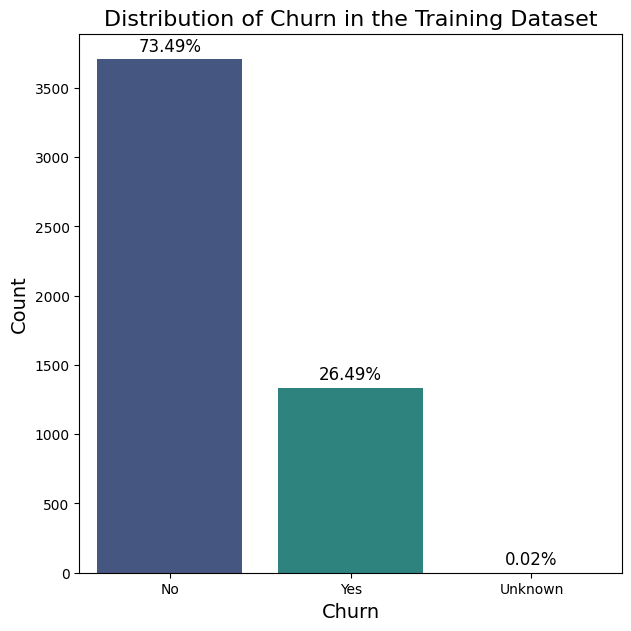

In [22]:
# Target (Churn) variable
target = 'Churn'
plt.figure(figsize=(7,7))  # Increased figure size for better readability
ax = sns.countplot(x=df_train_eda[target], palette='viridis')  # Added a color palette

# Add percentage labels on top of the bars
total = len(df_train_eda)
for container in ax.containers:
    labels = [f'{(h.get_height()/total)*100:.2f}%' for h in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=12)

# Adding titles and labels
plt.title('Distribution of Churn in the Training Dataset', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


- The Churn rate of the Telco is 26.49%

Column: tenure
Skewness: 0.23
Kurtosis: -1.39
Mean: 32.58
Median: 29.0
Standard Deviation: 24.53
----------------------------------------


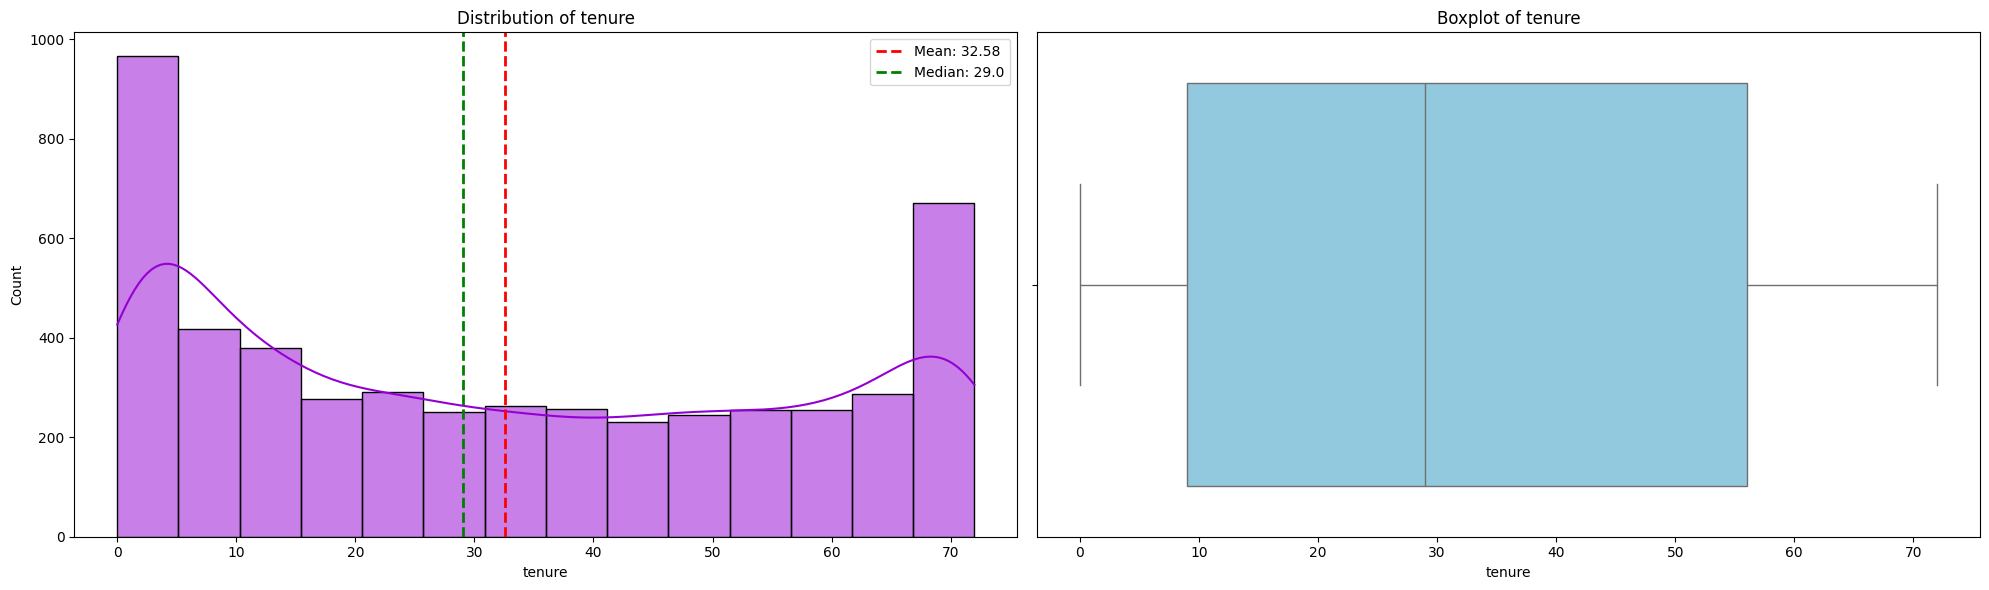

Column: MonthlyCharges
Skewness: -0.24
Kurtosis: -1.25
Mean: 65.09
Median: 70.55
Standard Deviation: 30.07
----------------------------------------


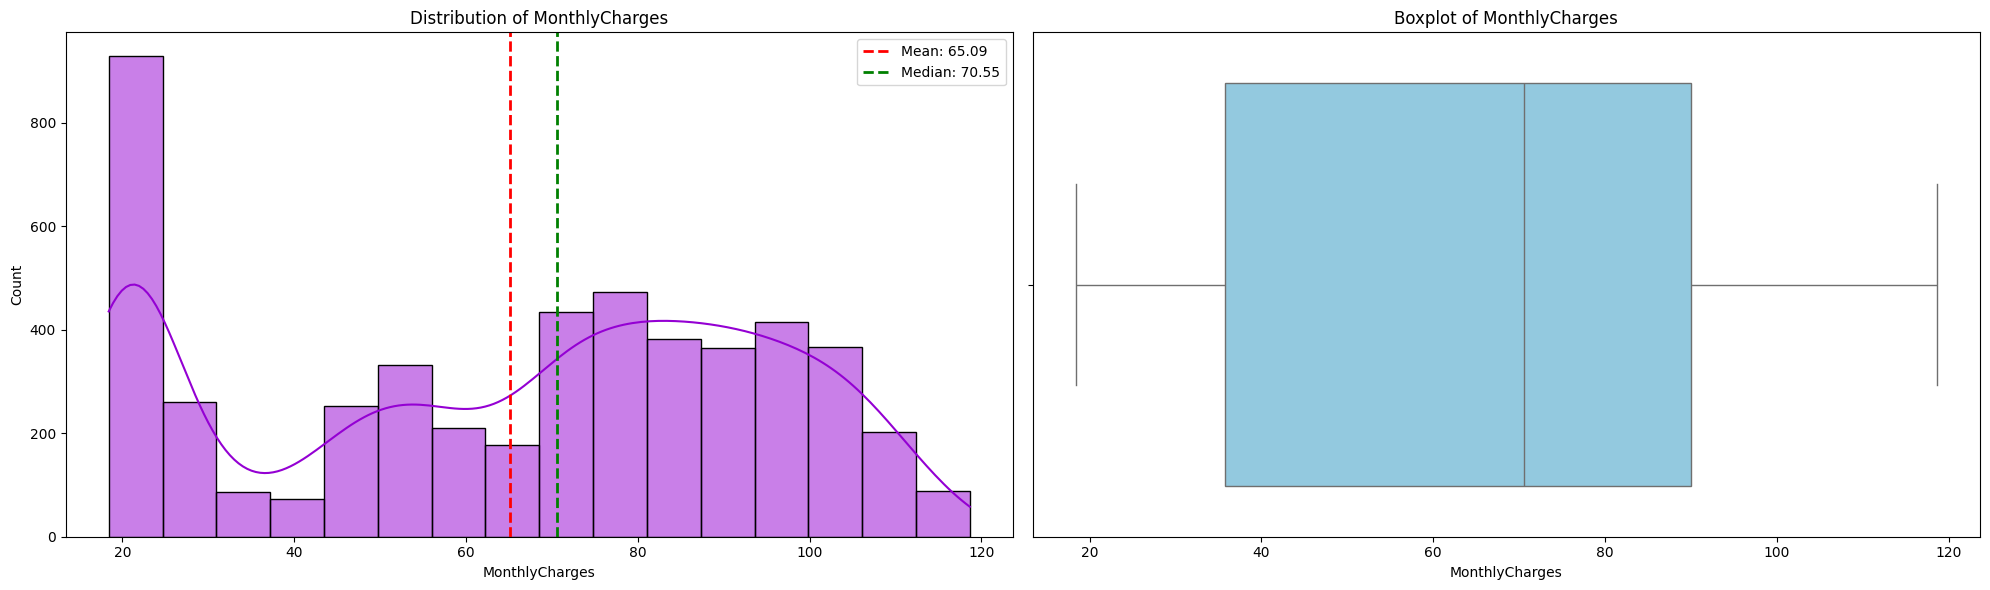

Column: TotalCharges
Skewness: 0.94
Kurtosis: -0.28
Mean: 2302.06
Median: 1401.15
Standard Deviation: 2269.48
----------------------------------------


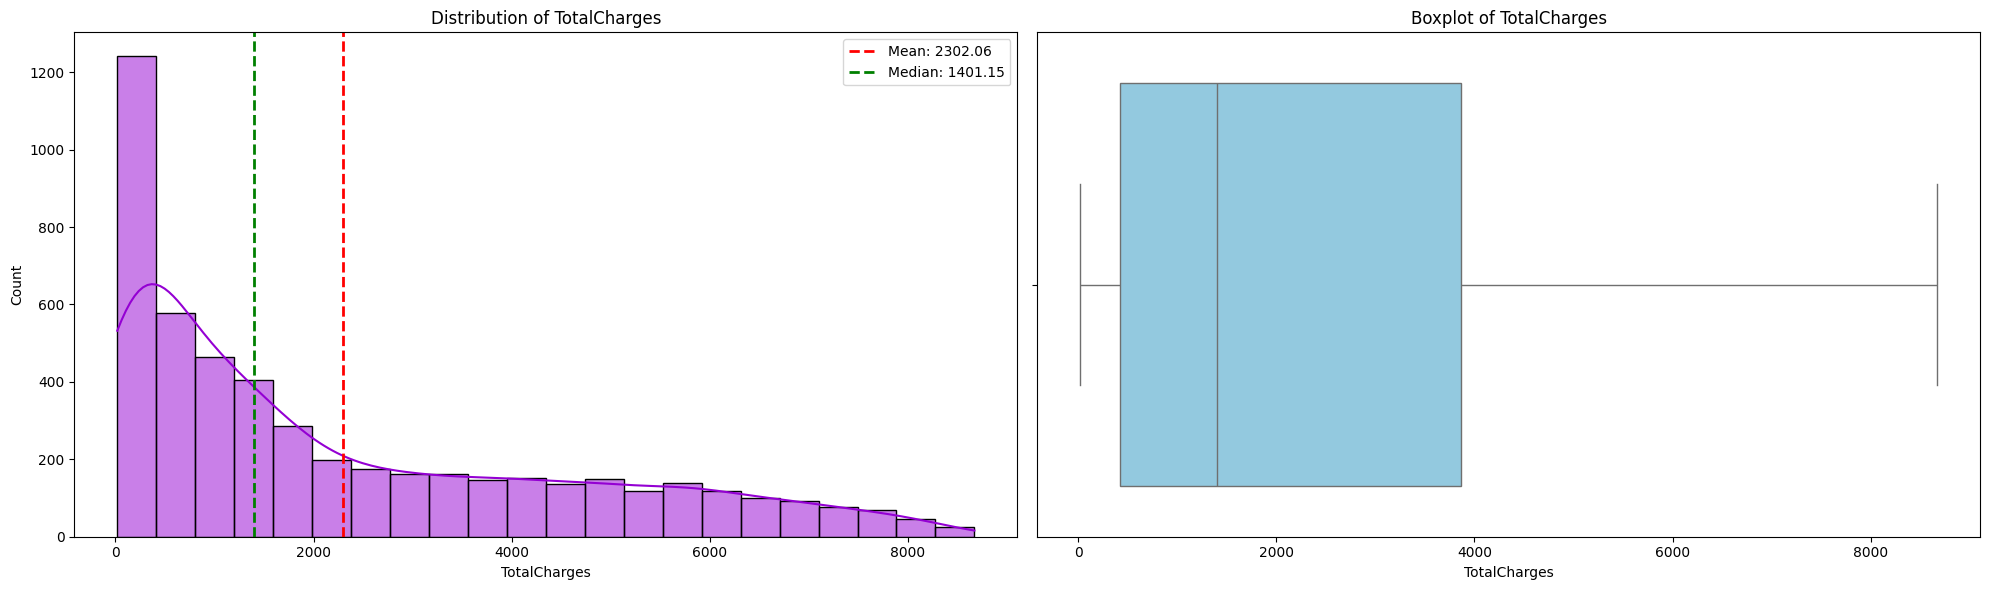

In [23]:
# Loop through each numerical column in the list
for col in subscriber_account_numerical:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[col].skew(), 2)
    kurtosis = round(df_train_eda[col].kurtosis(), 2)
    
    # Calculate basic statistics
    mean = round(df_train_eda[col].mean(), 2)
    median = round(df_train_eda[col].median(), 2)
    std_dev = round(df_train_eda[col].std(), 2)
    
    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("-" * 40)
    
    # Plot histograms with KDE and boxplots
    plt.figure(figsize=(20, 6))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[col], kde=True, color='darkviolet', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

**Tenure**

- **Distribution Insight:** 
  - The tenure data shows a bimodal distribution, with two distinct peaks – one at the lower end of the tenure range (around 0-10) and another at the higher end (around 70).
  - A skewness of 0.23 indicates that the distribution is slightly less positively skewed (right-skewed) with a concentration of customers at the lower end.
  - A platykurtic shape (kurtosis = -1.39) indicates the distribution is flatter and more spread out around the mean compared to a normal distribution (less peakiness) and the distribution is less sensitive to outliers or extreme values (lighter tails).

- **Mean vs. Median:** The mean tenure (32.58) slightly exceeds the median tenure (29.0), indicating a balance between the two peaks, but with a small number of customers with longer tenures which skews the average.

- **No Outliers:** There are no significant outliers, suggesting that while there is variation in customer tenure, most customers fall within a reasonable range around the mean and median.

- **Implications for Telco:** Understanding this bimodal distribution helps the telco identify two main segments of customers – those with very short tenures and those with very long tenures. Targeting retention strategies towards the short-tenure customers could help move them into the long-tenure group, thereby increasing overall customer retention and loyalty.

**Monthly Charges**

- **Distribution Insight:** 
  - The MonthlyCharges data shows a bimodal distribution with two peaks, one around 20 and another around 70-80, indicating two distinct groups of customers.
  - The largest peak is at the lower end (around 20), suggesting that a significant number of customers are paying lower monthly charges. 
  - A skewness of -0.24 indicates that the distribution is slightly less negatively skewed (left-skewed).
  - A platykurtic shape (kurtosis = -1.25) indicates the distribution is flatter and more spread out around the mean compared to a normal distribution (less peakiness) and the distribution is less sensitive to outliers or extreme values (lighter tails).

- **Mean vs. Median:** 
  - The mean MonthlyCharges (65.09) is slightly lower than the median (70.55). This suggests that while the majority of the customers pay below 70.55, there is a significant portion paying much less, which pulls the mean down.

- **Skewness and Kurtosis:**
  - Skewness of -0.24 and Kurtosis of -1.25 indicate that the distribution is slightly negatively skewed (left-skewed) and has a platykurtic shape (flatter than a normal distribution).

- **Outliers:** 
  - There do not appear to be significant outliers in the data, as indicated by the box plot on the right. This implies a relatively consistent distribution of charges among customers without extreme values.

- **Implications for Telco:** 
  - Understanding this distribution helps the telco identify that there are two main groups of customers: one with very low monthly charges and another with mid to high charges.
  - The telco might consider different marketing or retention strategies for these groups. For instance, customers with lower charges could be offered upgrades or additional services, while those with higher charges could be targeted with loyalty programs to prevent churn.

**Total Charges**

- **Distribution Insight:** The TotalCharges data shows a right-skewed distribution (Skewness: 0.94), with a concentration of customers at the lower end of charges.

- **Mean vs. Median:** The mean TotalCharges (2302.06) exceeds the median (1401.15), indicating a presence of higher charges from a smaller group of customers.

- **Outliers:** There are no obvious outliers (Kurtosis: -0.28), suggesting that while there are customers with higher charges, they do not significantly deviate from the overall distribution.

- **Implications for Telco:** Understanding this distribution helps the telco identify customer segments with varying revenue contributions. Targeting retention strategies towards customers with higher charges could mitigate churn risks effectively.


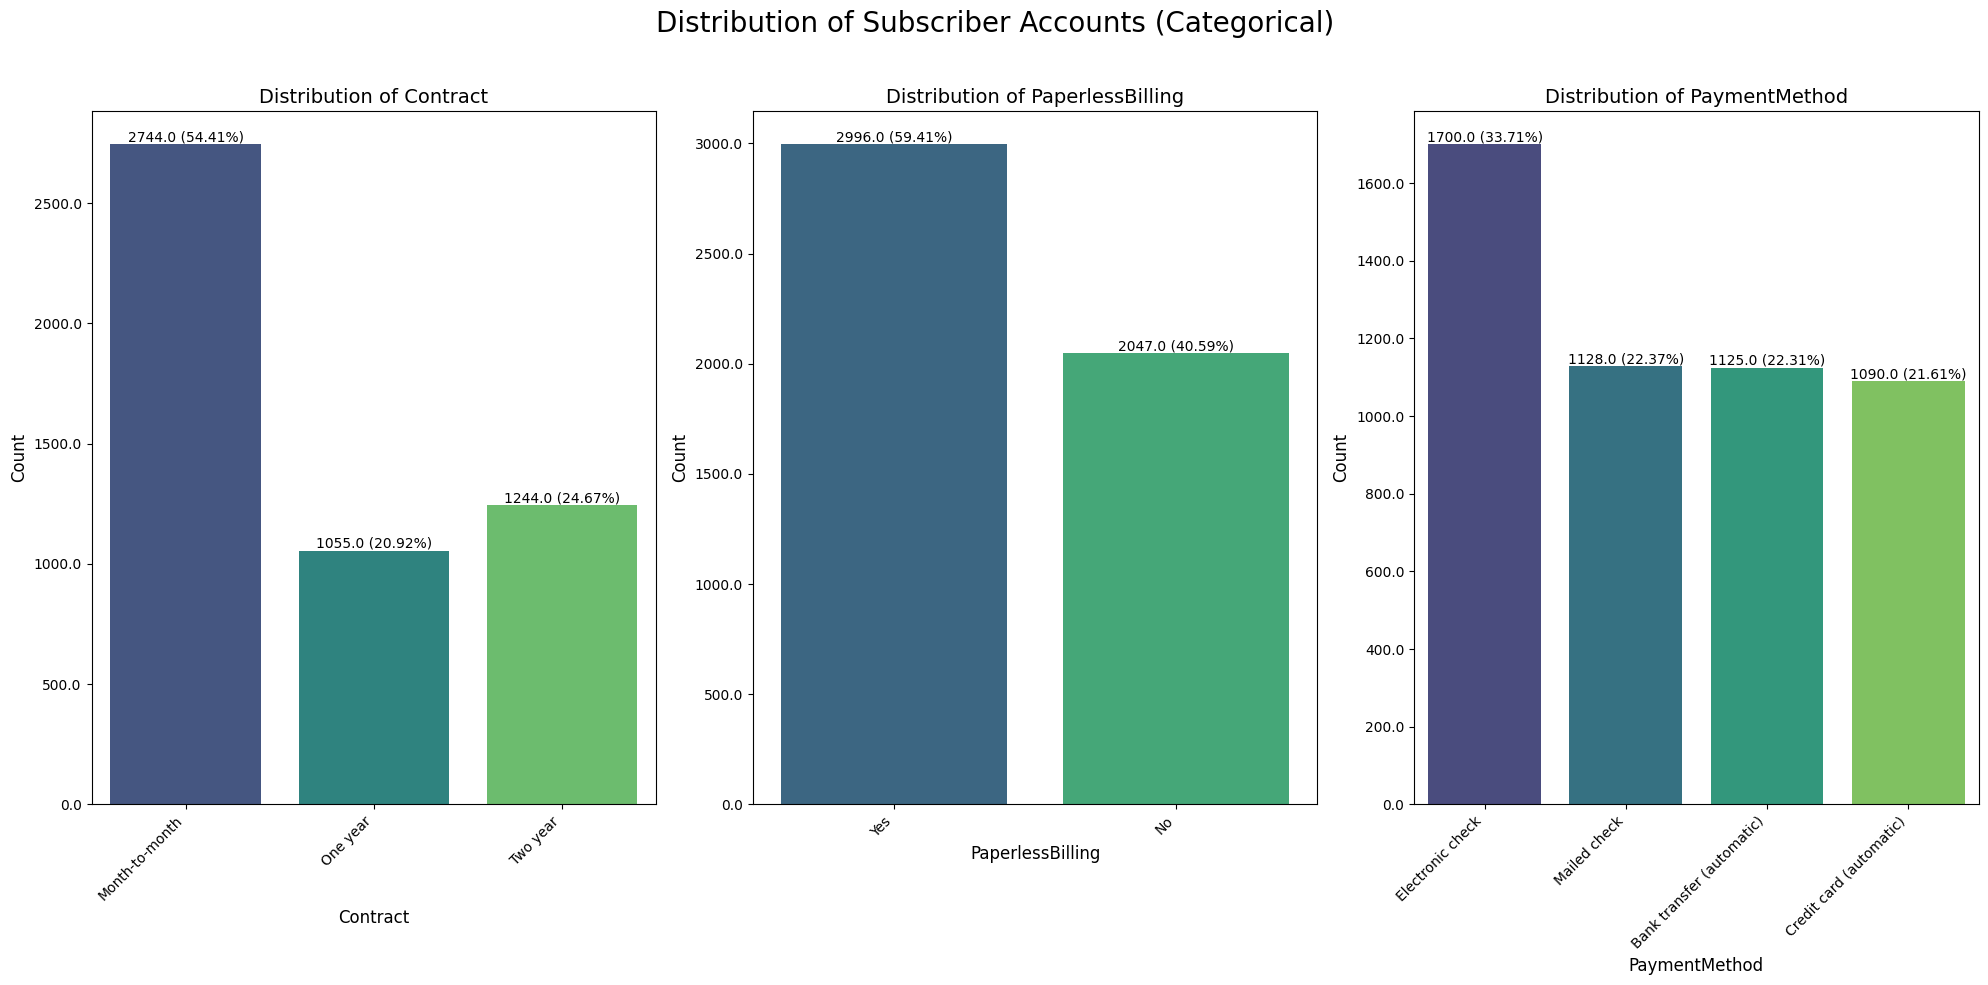

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_train_eda' is your DataFrame and 'subscriber_account_categorical' is your list of categorical features

# Calculate the number of rows and columns needed for subplots
num_features = len(subscriber_account_categorical)
cols = 3
rows = (num_features // cols) + (1 if num_features % cols != 0 else 0)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each subscription feature and create a count plot
for i, feature in enumerate(subscriber_account_categorical):
    ax = axes[i]
    sns.countplot(data=df_train_eda, x=feature, palette='viridis', ax=ax)
    
    # Calculate the percentage for each bar and add as label
    total = len(df_train_eda)
    for container in ax.containers:
        labels = [f'{h.get_height()} ({h.get_height()/total*100:.2f}%)' if h.get_height() > 0 else '' for h in container]
        ax.bar_label(container, labels=labels)
    
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Add a main title for the entire figure
fig.suptitle('Distribution of Subscriber Accounts (Categorical)', fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

- For the Subscriber Account segment, 54% the contracts are month-to-month and the rest of the 46% are almost evenly split between the annual & two year contracts

- 59% of the Subscriber Account are on Paperless Billing

- 33.7% of the Subscriber Account are on Electronic Check Payment Method

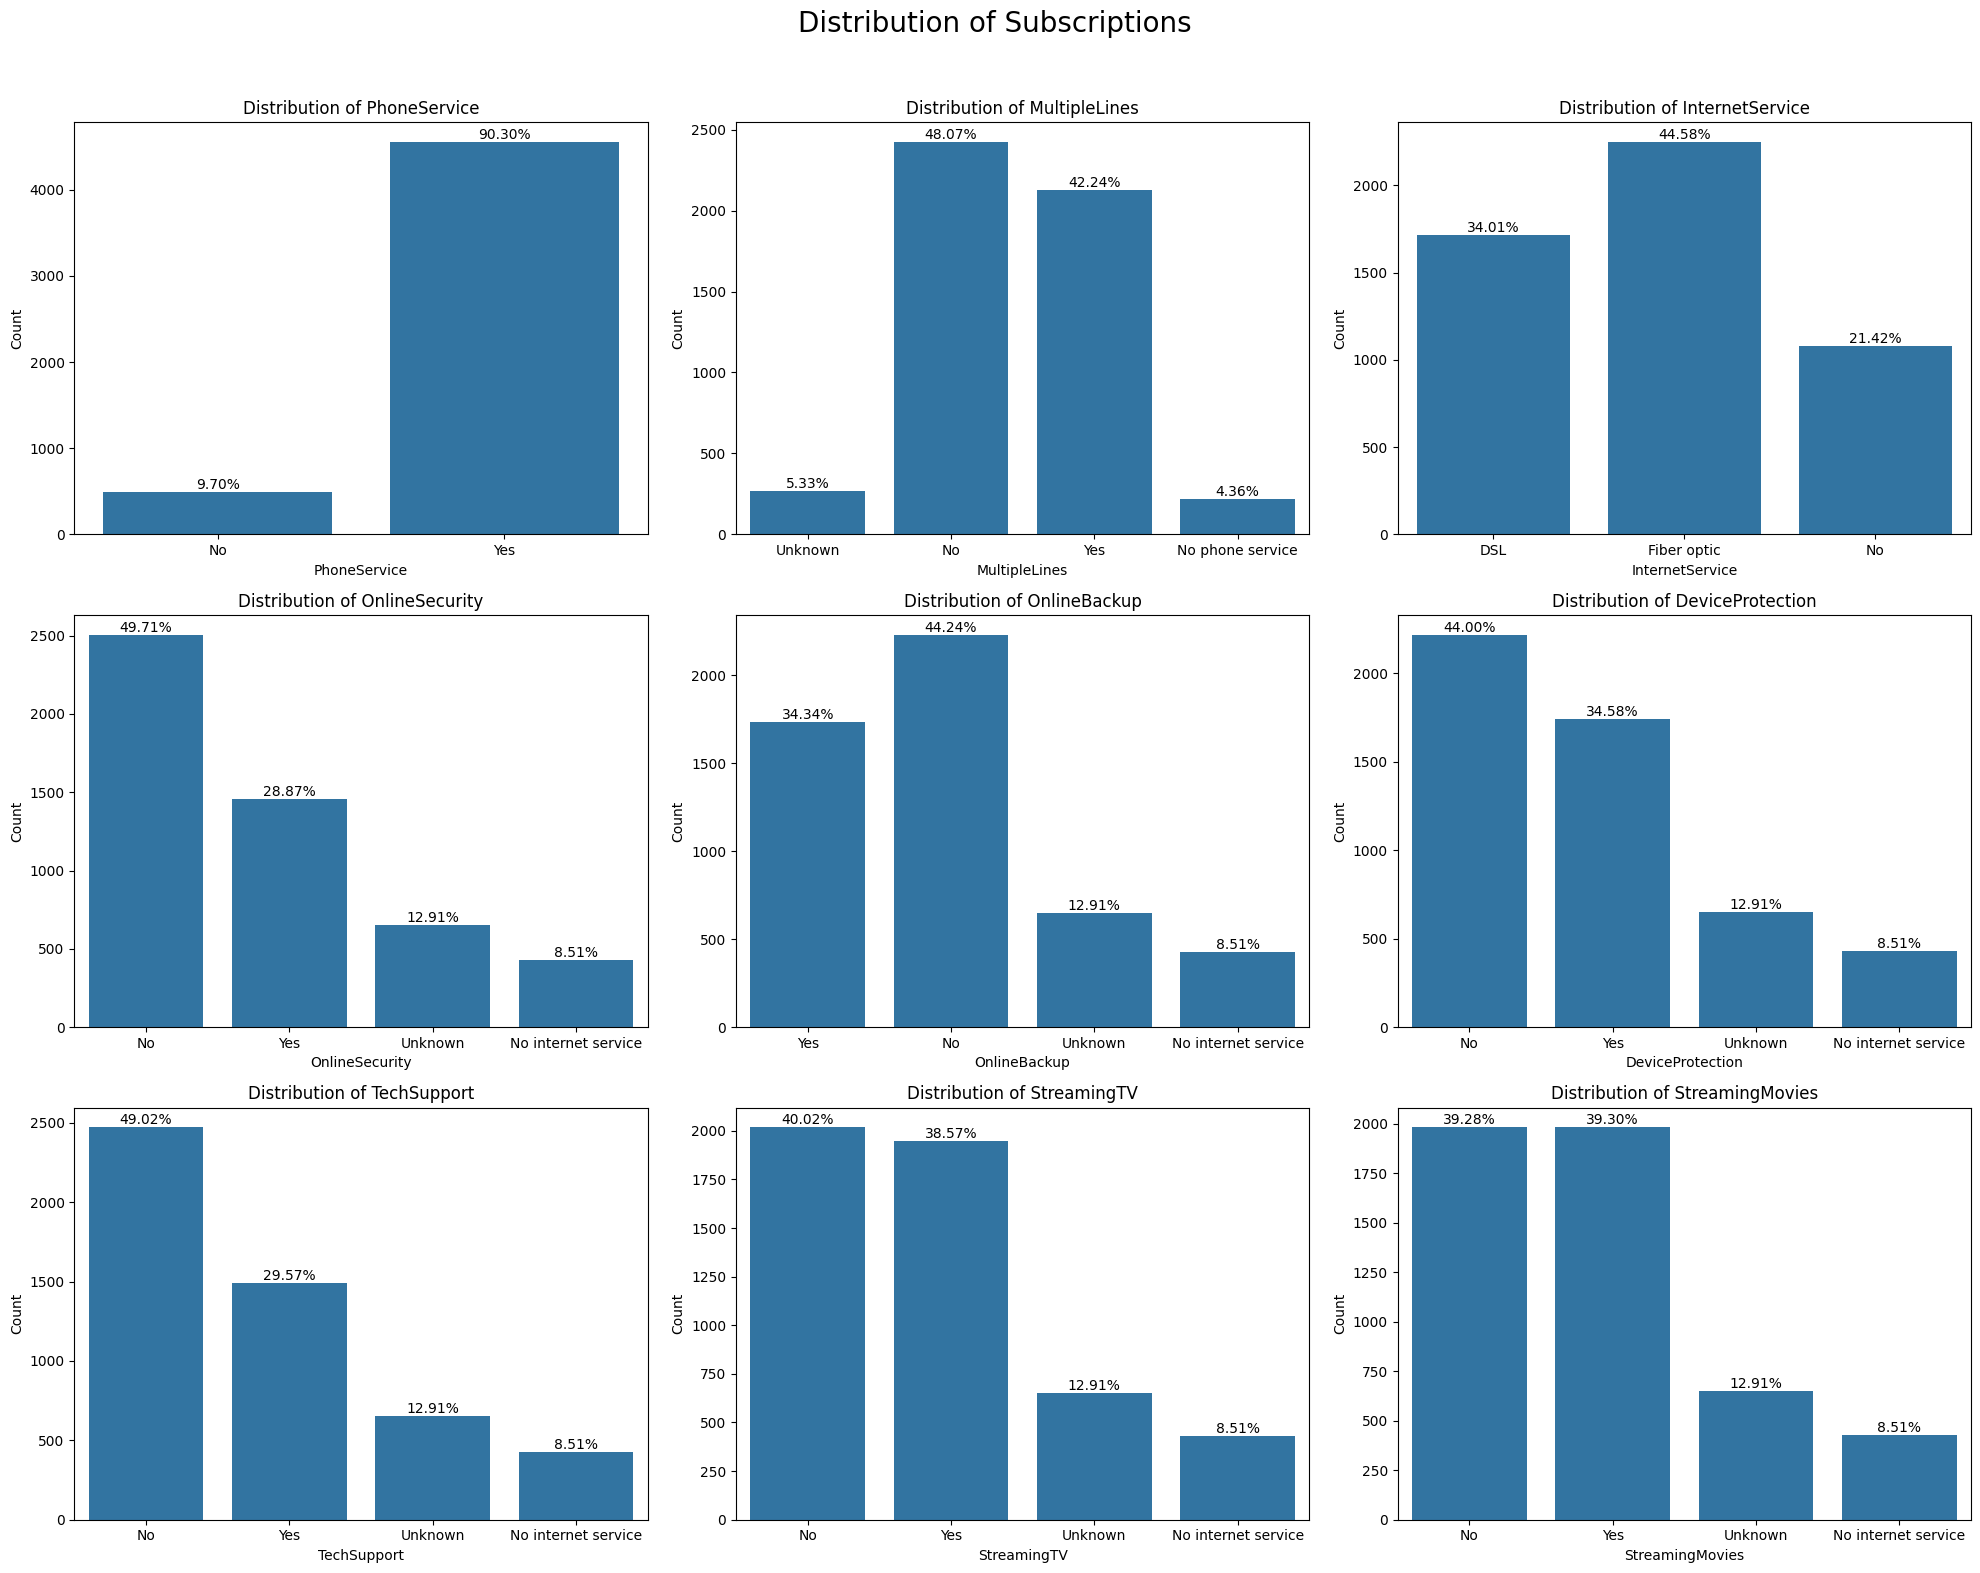

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns needed for subplots
num_features = len(subscriptions)
cols = 3
rows = (num_features // cols) + (1 if num_features % cols != 0 else 0)

# Create the subplots with a specified figure size
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each subscription feature and create a count plot
for i, feature in enumerate(subscriptions):
    ax = axes[i]
    sns.countplot(data=df_train_eda, x=feature, ax=ax)
    
    # Calculate the percentage for each bar and add it as a label
    for container in ax.containers:
        labels = [f'{h.get_height() / len(df_train_eda) * 100:.2f}%' for h in container]
        ax.bar_label(container, labels=labels)
    
    # Set titles and labels for each subplot
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Add a main title for the entire figure
fig.suptitle('Distribution of Subscriptions', fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()

- **Distribution of PhoneService:**
  - A vast majority of customers (90.30%) have phone service.
  - Only a small fraction (9.70%) do not have phone service.

- **Distribution of MultipleLines:**
  - Nearly half of the customers (48.07%) do not have multiple lines.
  - A significant portion (42.24%) have multiple lines, with a small percentage (5.33%) unknown.

- **Distribution of InternetService:**
  - The majority of customers use Fiber optic (44.38%) followed by DSL (34.01%).
  - A notable portion of customers (21.42%) do not use internet services.

- **Distribution of OnlineSecurity:**
  - Nearly half of the customers (49.71%) do not subscribe to online security services.
  - A significant percentage (28.87%) have online security, with a small percentage (12.91%) unknown.

- **Distribution of OnlineBackup:**
  - A considerable portion of customers (44.24%) do not use online backup services.
  - A smaller percentage (34.34%) have online backup services, with some (12.91%) unknown.

- **Distribution of DeviceProtection:**
  - A large portion of customers (44.00%) do not have device protection services.
  - A significant number (34.58%) have device protection, with a small percentage (12.91%) unknown.

- **Distribution of TechSupport:**
  - Almost half of the customers (49.02%) do not subscribe to tech support services.
  - A notable portion (29.57%) have tech support, with some (12.91%) unknown.

- **Distribution of StreamingTV:**
  - A significant number of customers (40.02%) do not subscribe to streaming TV services.
  - A substantial portion (38.57%) have streaming TV services, with some (12.91%) unknown.

- **Distribution of StreamingMovies:**
  - A considerable portion of customers (39.28%) do not use streaming movie services.
  - An almost equal percentage (39.30%) have streaming movie services, with some (12.91%) unknown.

#### C. Bivariate Analysis

In [26]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_feature_vs_target(df_train_eda, categorical_features, target):
    # Calculate the number of rows and columns for subplots
    number_of_columns = 3
    number_of_rows = math.ceil(len(categorical_features) / number_of_columns)

    # Create the figure and set the size dynamically based on the number of rows
    fig = plt.figure(figsize=(20, 6 * number_of_rows))

    for i, column in enumerate(categorical_features, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, i)
        
        # Plot the countplot with the specified hue
        sns.countplot(data=df_train_eda, x=column, hue=target, ax=ax)
        
        # Set labels and title for each subplot
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {column} vs {target}')
        
        # Rotate x-axis labels for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Calculate and add percentage labels to each bar
        total_counts = len(df_train_eda)
        for container in ax.containers:
            labels = [f'{h.get_height() / total_counts * 100:.1f}%' for h in container]
            ax.bar_label(container, labels=labels)
        
        # Move the legend to the top right corner inside the plot
        ax.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()

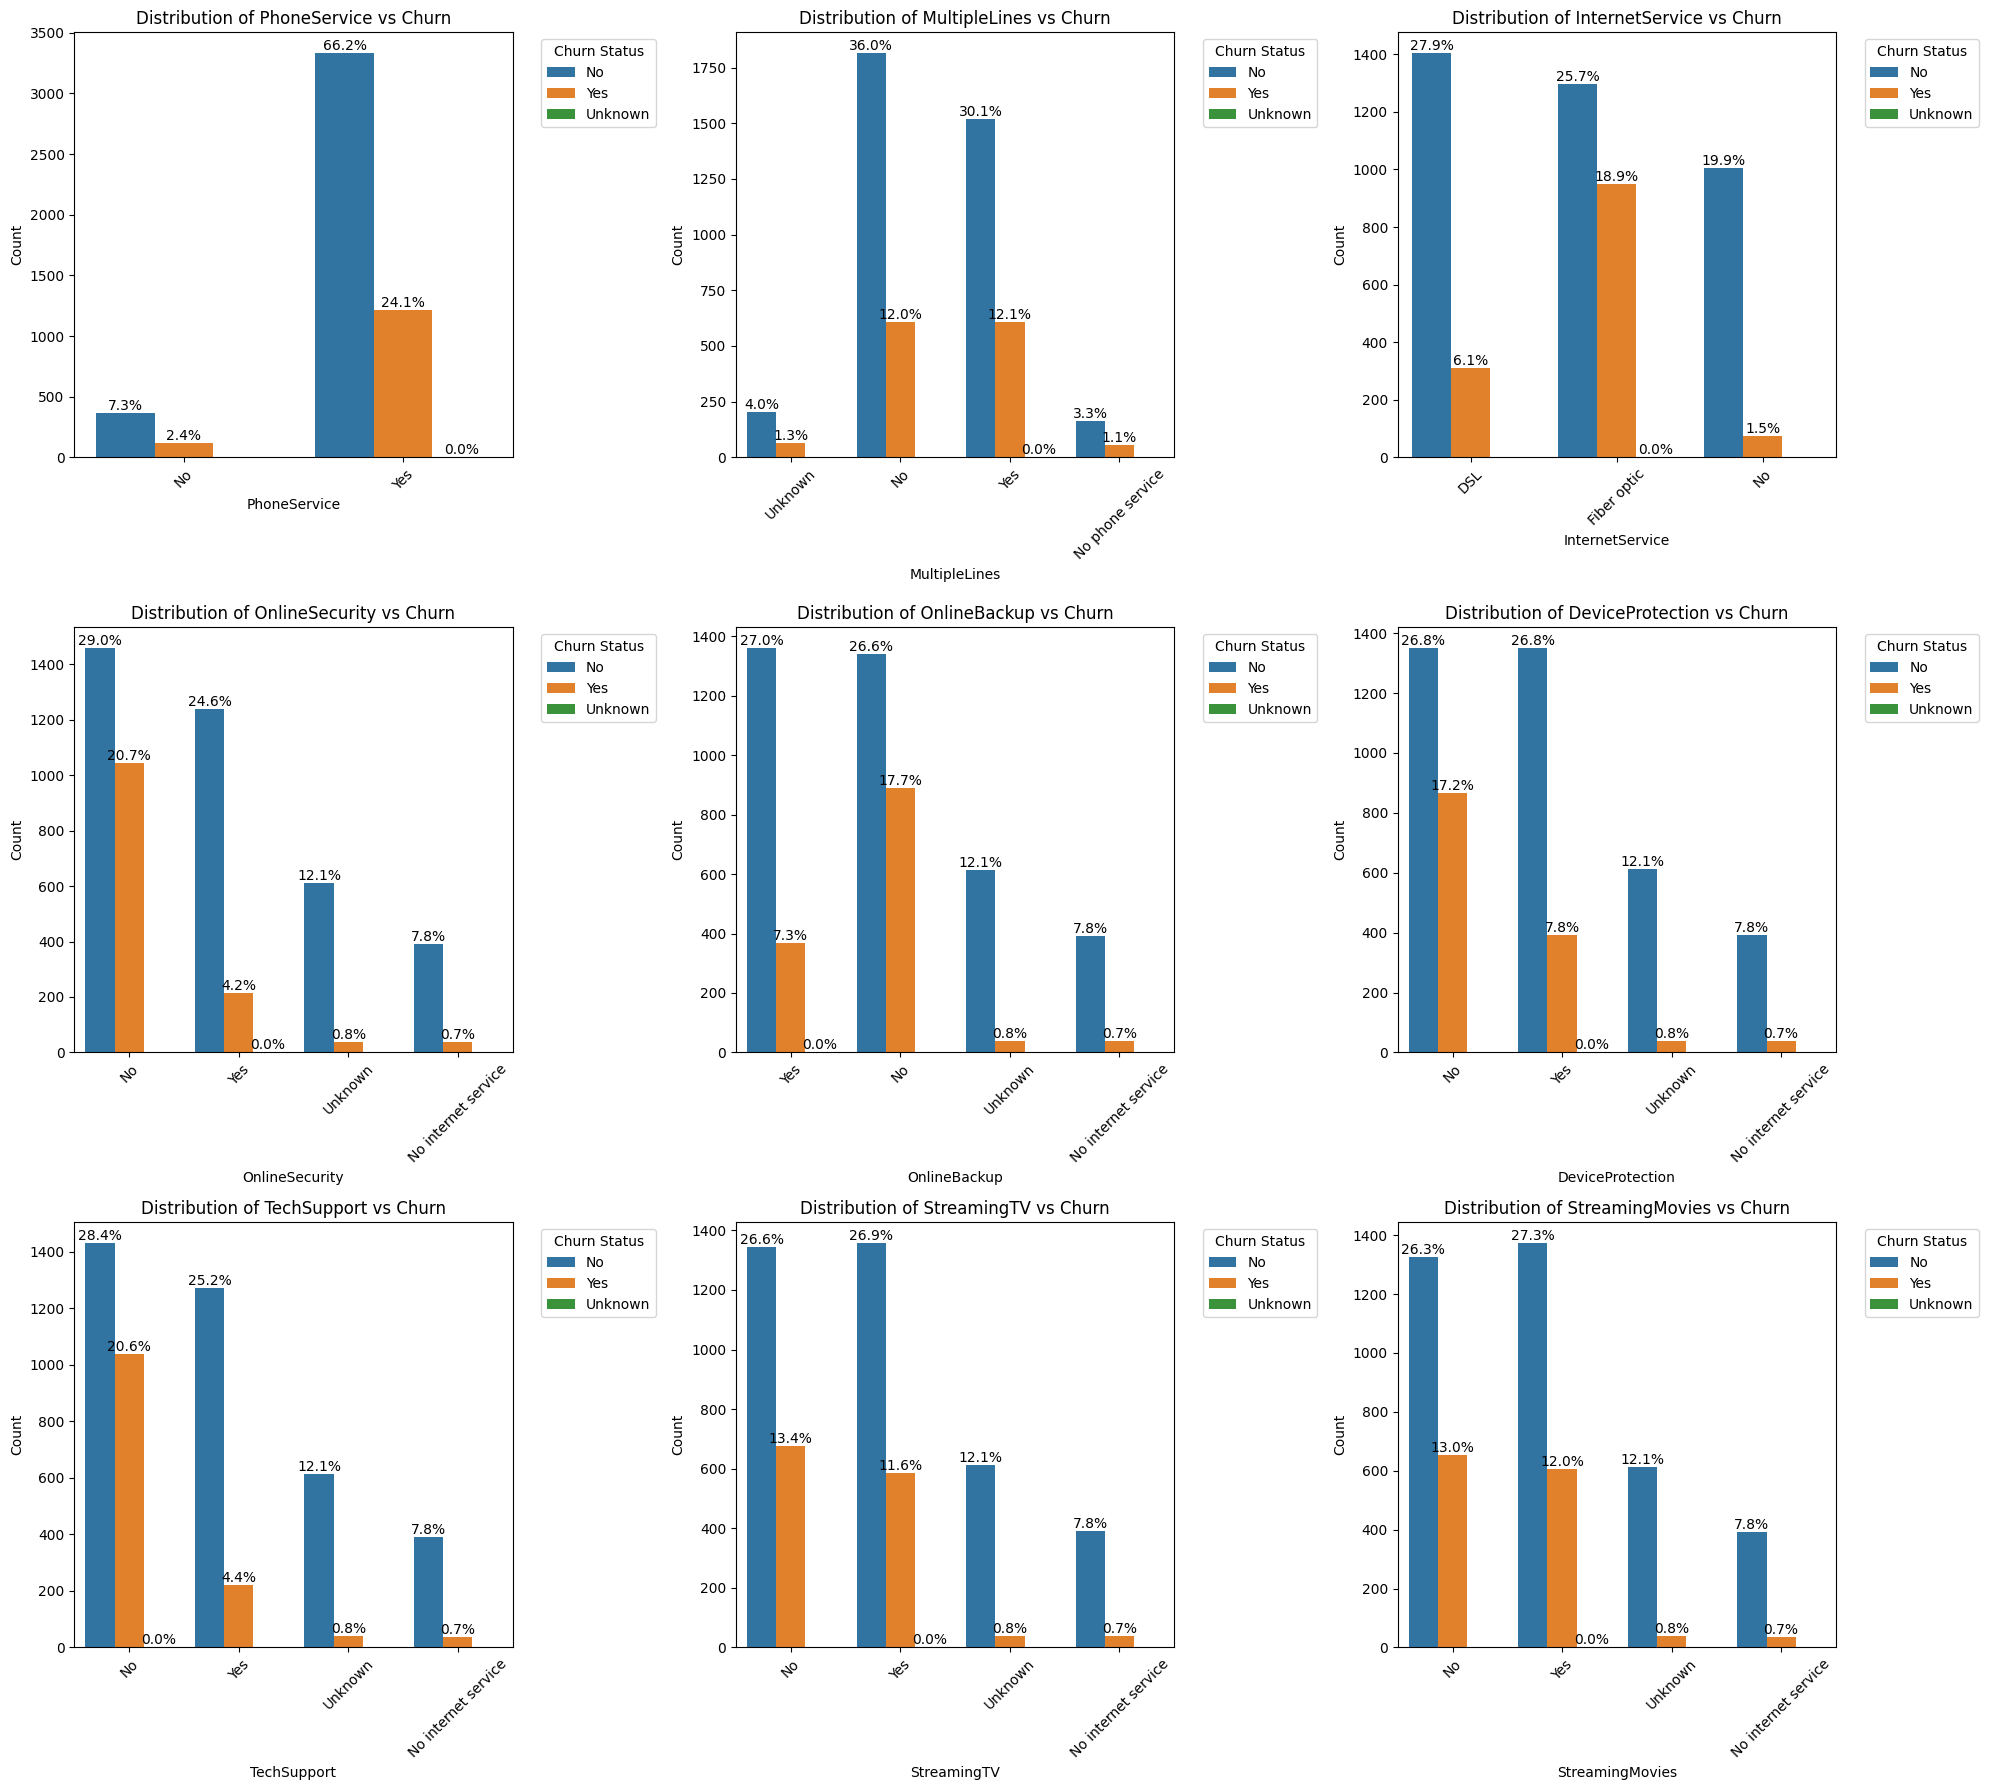

In [27]:
# Subscribtions are services subscribed to by the customers
subscriptions = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_feature_vs_target(df_train_eda, subscriptions, "Churn")

- **Distribution of PhoneService vs Churn:**
  - Most customers with phone service (66.7%) do not churn, but a significant portion (24.1%) do churn.
  - Only a small percentage of customers without phone service churn (2.4%).

- **Distribution of MultipleLines vs Churn:**
  - Customers with no multiple lines have a higher churn rate (22.1%) compared to those with multiple lines (20.0%).
  - A notable percentage (36.0%) of customers with unknown multiple lines status do not churn.

- **Distribution of InternetService vs Churn:**
  - Fiber optic customers have the highest churn rate (25.7%), while those with no internet service have a lower churn rate (19.9%).
  - DSL customers have a lower churn rate (6.1%) compared to fiber optic customers.

- **Distribution of OnlineSecurity vs Churn:**
  - Customers without online security have a higher churn rate (30.7%) compared to those with online security (24.6%).
  - A small percentage (0.9%) of customers with unknown online security status churn.

- **Distribution of OnlineBackup vs Churn:**
  - Customers without online backup have a higher churn rate (26.6%) compared to those with online backup (17.7%).
  - A small percentage (0.8%) of customers with unknown online backup status churn.

- **Distribution of DeviceProtection vs Churn:**
  - Customers without device protection have a higher churn rate (26.6%) compared to those with device protection (17.7%).
  - A small percentage (0.8%) of customers with unknown device protection status churn.

- **Distribution of TechSupport vs Churn:**
  - Customers without tech support have a higher churn rate (30.6%) compared to those with tech support (25.2%).
  - A small percentage (0.8%) of customers with unknown tech support status churn.

- **Distribution of StreamingTV vs Churn:**
  - Customers without streaming TV have a higher churn rate (26.9%) compared to those with streaming TV (19.6%).
  - A small percentage (0.8%) of customers with unknown streaming TV status churn.

- **Distribution of StreamingMovies vs Churn:**
  - Customers without streaming movies have a higher churn rate (27.3%) compared to those with streaming movies (19.6%).
  - A small percentage (0.8%) of customers with unknown streaming movies status churn.

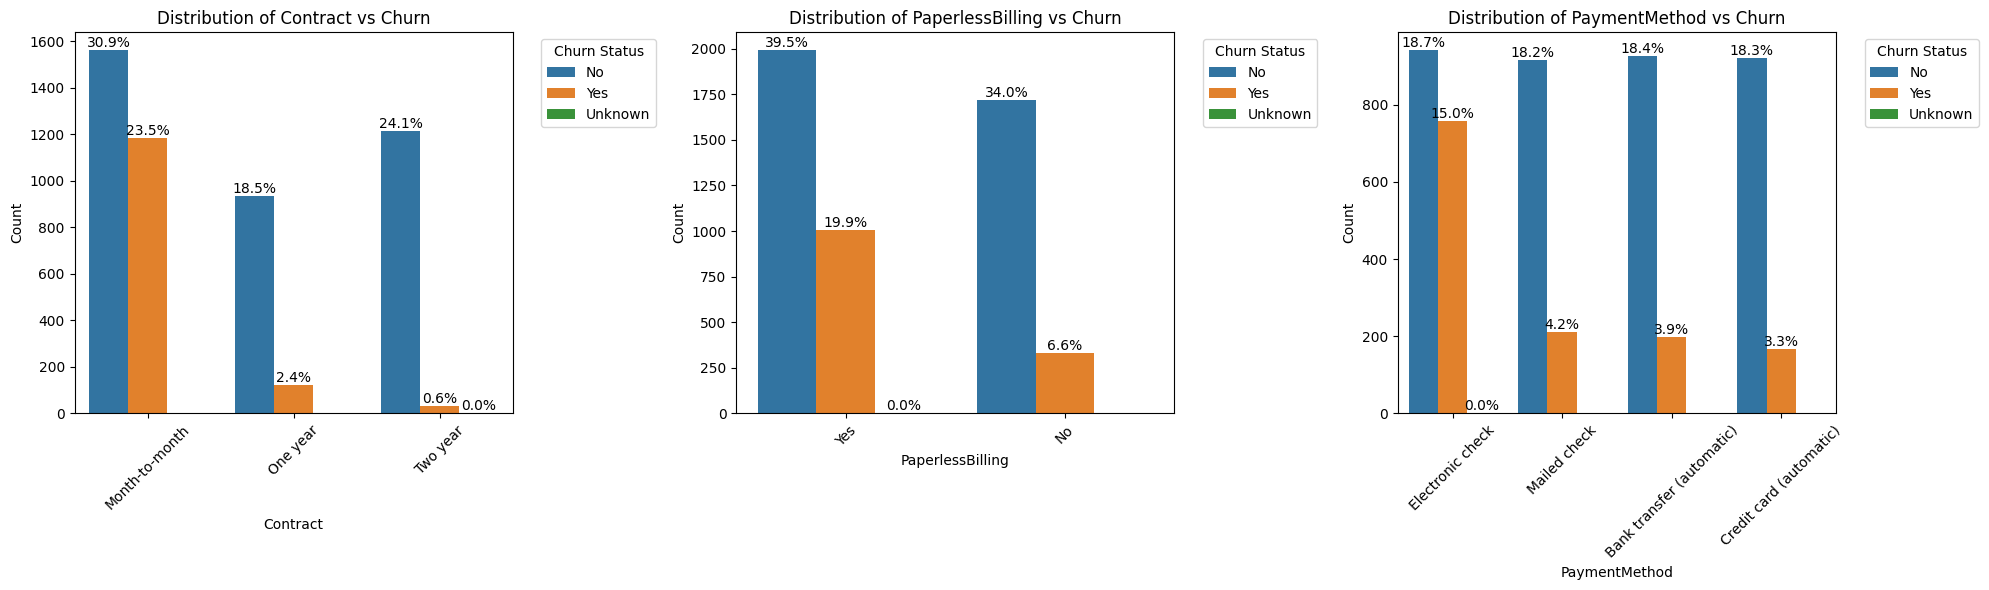

In [28]:
# Account Categorical features vs Target(Churn)
subscriber_account_categorical = ['Contract','PaperlessBilling','PaymentMethod']
plot_categorical_feature_vs_target(df_train_eda, subscriber_account_categorical, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The Churn rate for the month-to-month contract is 23.5% in relation to the other contract types and is quite close to the overall Telco churn rate of 26.5%

- For Paperless Billing, more customers that are billed this way churn (more 19.9%) compared to those that do not (6.6%).

- For Payment Method, more customers that pay through electronic check churn more (15.0%) compared to other payment methods.

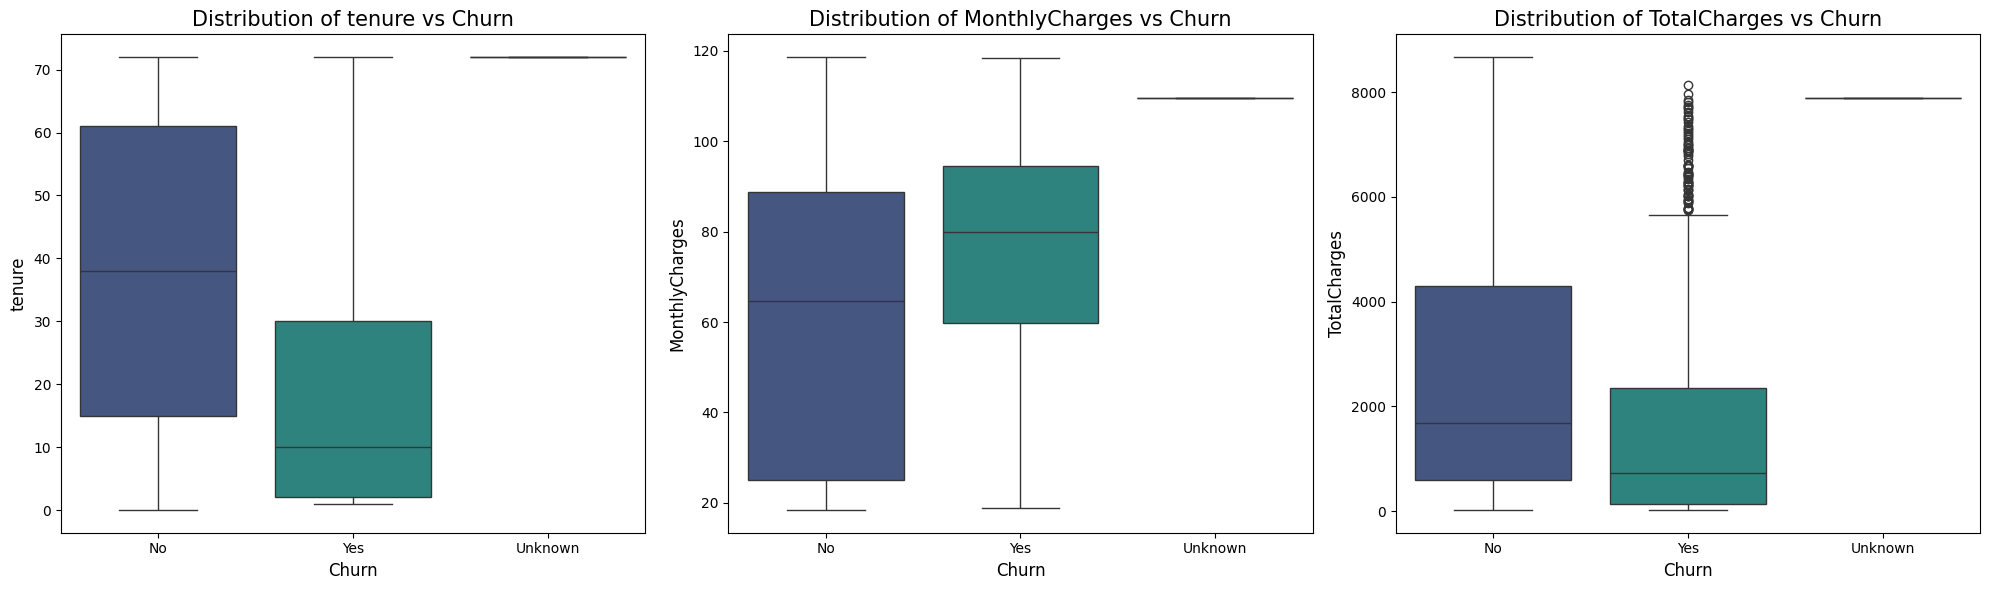

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def check_for_outliers(df_train_eda, numerical_features):
    # Calculate the number of rows and columns for subplots
    number_of_columns = 3
    number_of_rows = math.ceil(len(numerical_features) / number_of_columns)

    # Create the figure and set the size dynamically based on the number of rows
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(20, 6 * number_of_rows))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate through each numerical feature and create a box plot
    for i, feature in enumerate(numerical_features):
        ax = axes[i]
        
        # Create a box plot for the numerical feature grouped by 'Churn'
        sns.boxplot(data=df_train_eda, x='Churn', y=feature, palette='viridis', ax=ax)
        
        # Set plot title and labels
        ax.set_title(f'Distribution of {feature} vs Churn', fontsize=15)
        ax.set_xlabel('Churn', fontsize=12)
        ax.set_ylabel(feature, fontsize=12)
    
    # Remove any unused subplots
    for i in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


check_for_outliers(df_train_eda, subscriber_account_numerical)

**Tenure vs Churn**
- **No**: Customers who did not churn have a higher median tenure, around 40 months. The interquartile range (IQR) spans from approximately 15 to 60 months.
- **Yes**: Customers who churned have a much lower median tenure, around 10 months, with an IQR from approximately 2 to 25 months.

**MonthlyCharges vs Churn**
- **No**: Customers who did not churn have a median monthly charge of around 70, with an IQR spanning from 35 to 90.
- **Yes**: Customers who churned have a higher median monthly charge of around 80, with an IQR from approximately 60 to 95.

**TotalCharges vs Churn**
- **No**: Customers who did not churn have a higher median total charge of around GHC 2800, with an IQR spanning from 1000 to 4500.
- **Yes**: Customers who churned have a significantly lower median total charge of around 500, with an IQR from 50 to 2500. The are high outliers compared to the No category.

**Note:** The unknown category shows a consistent distribution across the numerical features but needs further investigation for clarity.

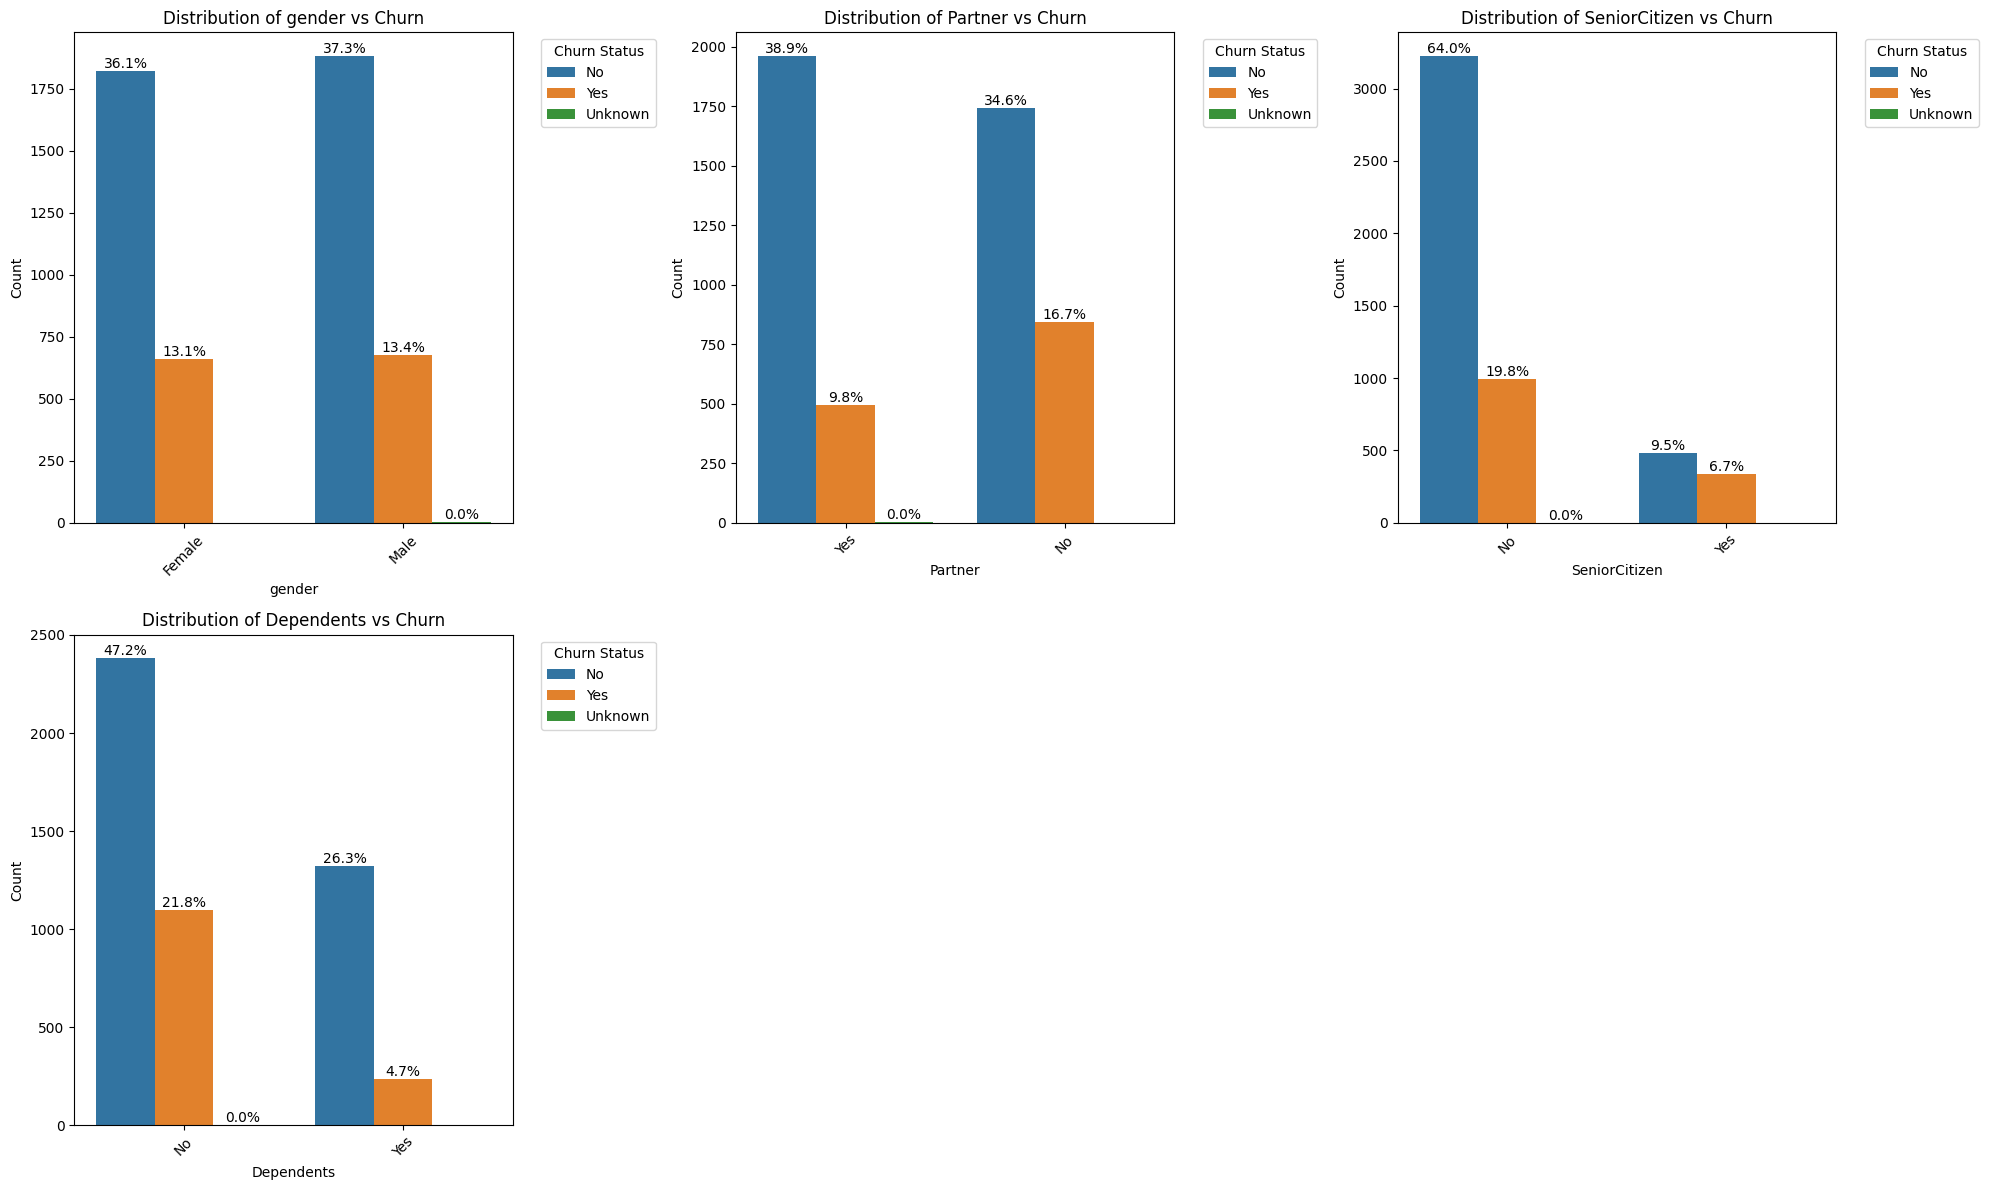

In [30]:
# Subcriber Demographic Information('gender', 'Partner', 'SeniorCitizen', 'Dependents')

subscriber_demographic = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

plot_categorical_feature_vs_target(df_train_eda, subscriber_demographic, "Churn")
for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The Churn rate of Subscriber Demographics are as follows: ['gender'] both Males and Females are approximately 13%.

- Subscribers with ['Partners'] Churn at 9.8% versus those without Churn at 16%

- Subscribers with ['Dependents'] Churn at only 4.7% versus those without Churn at 21%


#### D. Multivariate Analysis

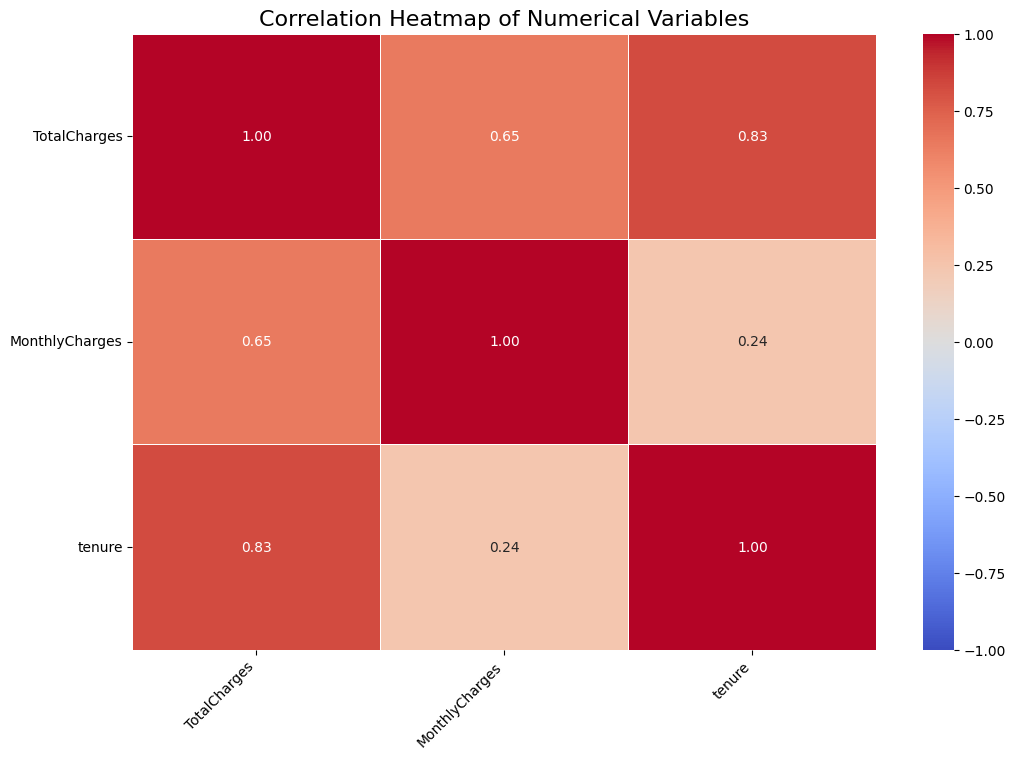

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df, numerical_features, title='Correlation Heatmap of Numerical Variables'):

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corr()

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")

    # Set the title and labels
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Show the plot
    plt.show()

subscriber_account_numerical = ['TotalCharges', 'MonthlyCharges', 'tenure']
plot_correlation_heatmap(df_train_eda, subscriber_account_numerical)


- The tenure has a relatively strong positive correlation with TotalCharges at 0.83

- MonthlyCharges has a relavtively moderate positive correlation with TotalCharges at 0.65

- The tenure has a relatively weak positive correlation with MonthlyCharges at 0.24

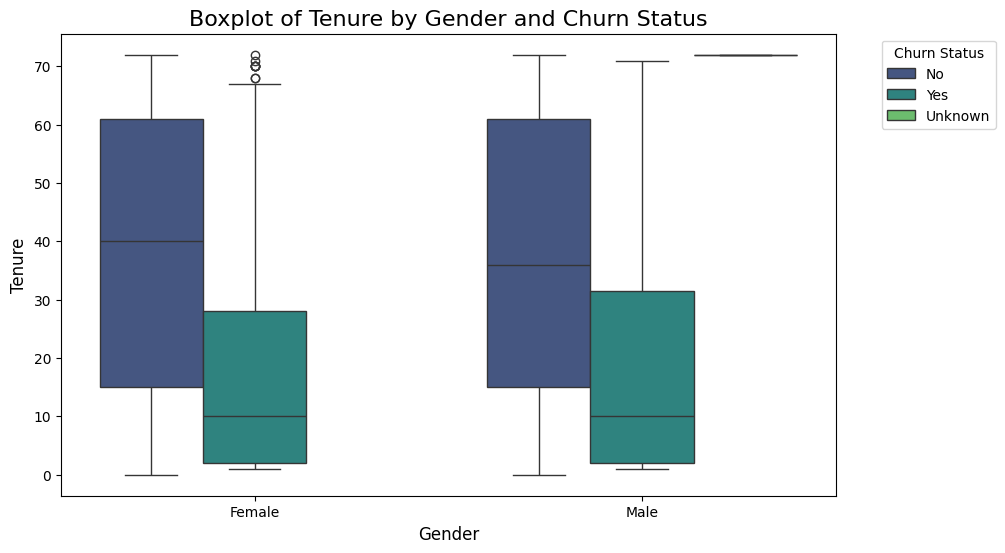

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to show the distribution of tenure by gender, separated by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='tenure', hue='Churn', data=df_train_eda, palette='viridis')

# Set the title and labels
plt.title('Boxplot of Tenure by Gender and Churn Status', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Tenure', fontsize=12)

# Display the legend and customize its title
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


- Tenure is inversely correlated with churn status where the number of males and females that churn is quite similar with slightly more males churning.

- There are noticeable high outliers for the tenure of females that churn.

- For both males and females, churn rate is positively skewed indicating more concentration of customers at the lower end of the distribution.

<Figure size 1200x800 with 0 Axes>

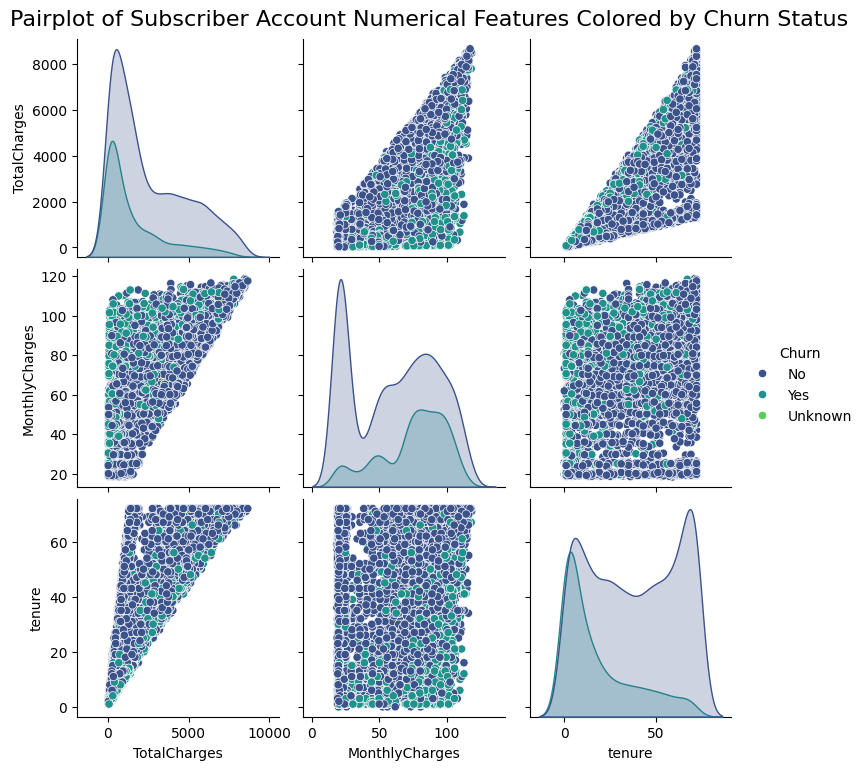

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot of the selected numerical features colored by the 'Churn' variable
plt.figure(figsize=(12, 8))
sns.pairplot(df_train_eda[subscriber_account_numerical + ['Churn']], hue='Churn', palette='viridis')

# Set a descriptive title for the plot
plt.suptitle('Pairplot of Subscriber Account Numerical Features Colored by Churn Status', fontsize=16, y=1.02)

# Show the plot
plt.show()

- The churn effect of TotalCharges appears to correlate with the effect of tenure (strong) and MonthlyCharges (moderate).

- The distribution of tenure for those that churn is different from those that do not churn when compared to the other categories of MonthlyCharges and TotalCharges.

#### E. Analytical Questions and Feature Engineering

##### i. No Feature Engineering

**1. What is the churn rate for customers with only Phone_service**

Churn rate for customers with only PhoneService:
Churn
No         73.276241
Yes        26.701801
Unknown     0.021959
Name: proportion, dtype: float64


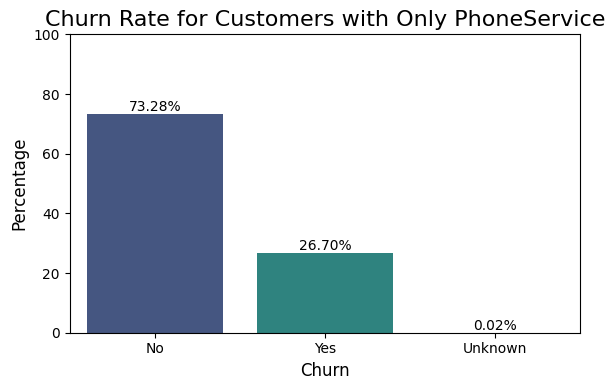

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_eda is your DataFrame containing the training data

# Filter customers with only PhoneService
phone_service_only = df_train_eda[df_train_eda['PhoneService'] == 'Yes']

# Calculate churn rate as a percentage
churn_rate = phone_service_only['Churn'].value_counts(normalize=True) * 100

# Print churn rate
print("Churn rate for customers with only PhoneService:")
print(churn_rate)

# Visualize the churn rate
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
plt.title('Churn Rate for Customers with Only PhoneService', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Churn', fontsize=12)
plt.ylim(0, 100)

# Add text annotations for each bar
for index, value in enumerate(churn_rate.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

- The Churn Rate for customers with only phone service is 26.7% is very close to the Telco churn rate of 26.49%

**2. Does the type of contract affect the churn?**

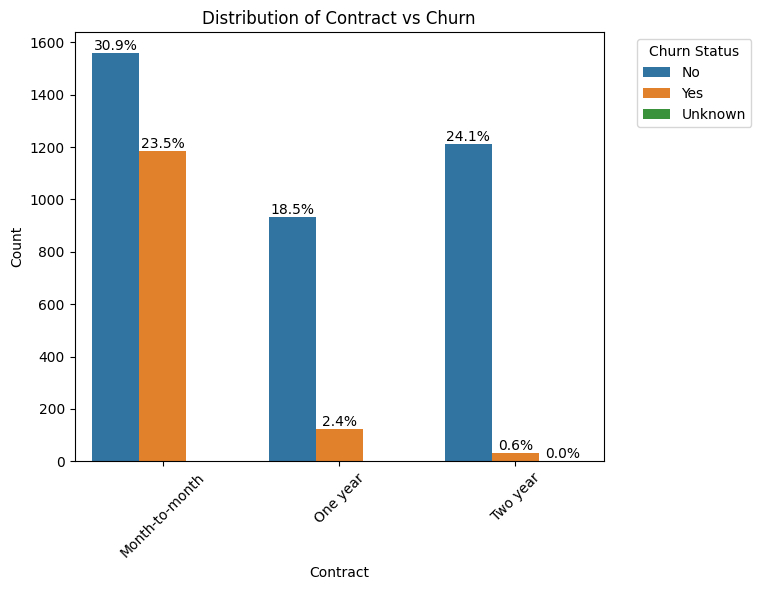

In [35]:
# Contract vs Target(Churn)
contract_type = ['Contract']
plot_categorical_feature_vs_target(df_train_eda, contract_type, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The two year contract has the lower churn rate as compared to the one year contract

- The month-to-month contract with the highest churn rate is not too distinct from the company churn rate of 26.49

**3. How does the customer payment_method vary with the churn rate?**

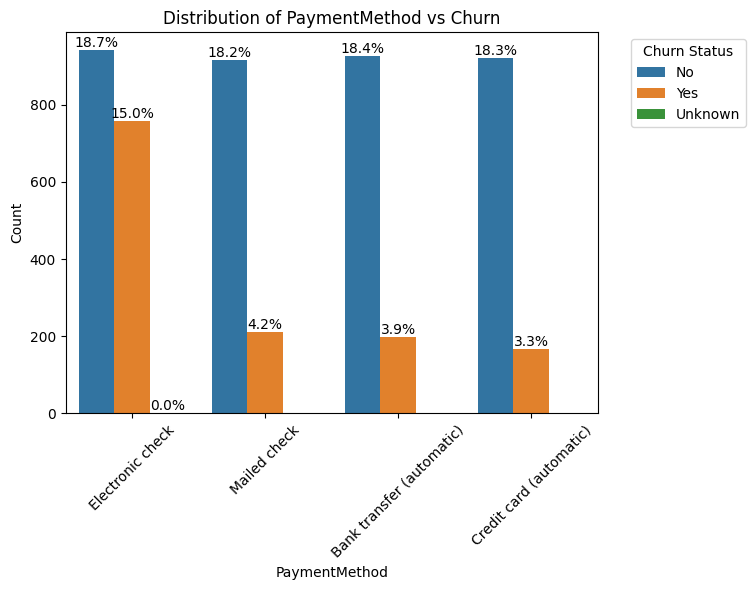

In [36]:
# Payment_method vs Target(Churn)
paymt_type = ['PaymentMethod']
plot_categorical_feature_vs_target(df_train_eda, paymt_type, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The Churn rate is highest for subcribers using Electronic check payments.

**4. Is churn affected by the presence of partner or dependents?**

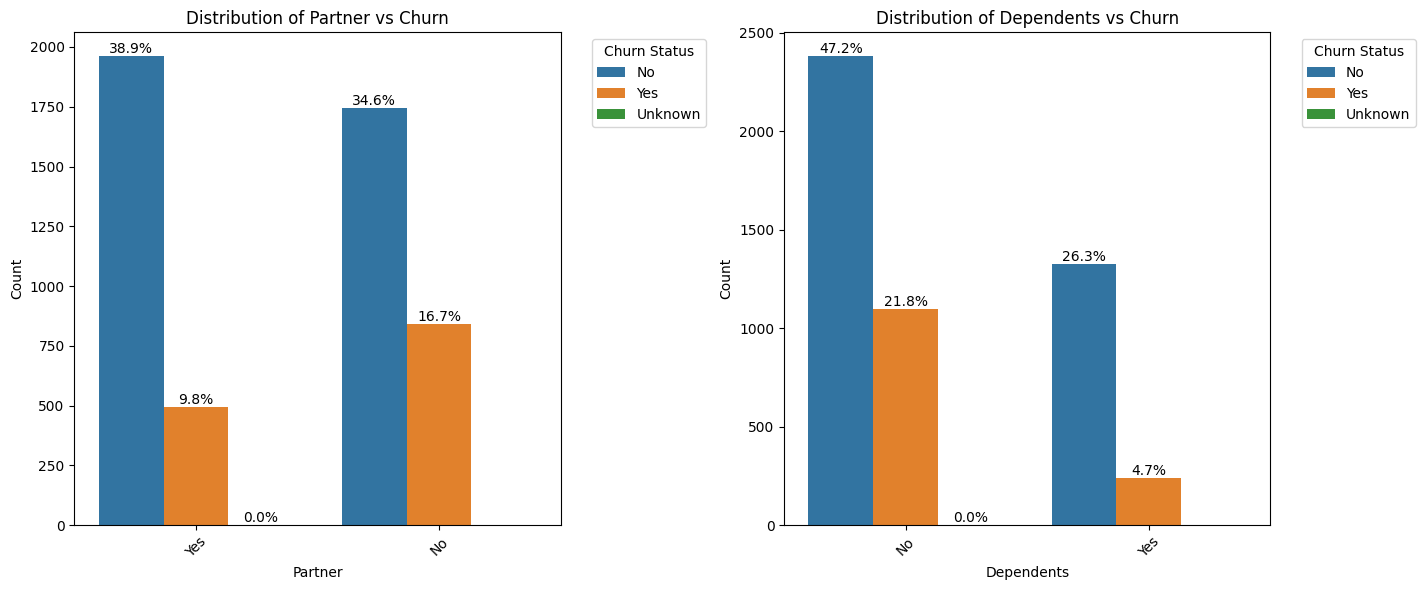

In [37]:
part_depend = ['Partner', 'Dependents']

plot_categorical_feature_vs_target(df_train_eda, part_depend, "Churn")
for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- Subscribers without partners have higher churn rate (16.7%) in contrast with those having partners(9.8%)

- Subscribers without Dependents also have higher churn rate (21.8%) in contrast with those having dependents(4.7%)

##### ii. Feature Engineering

**5. How do the average monthly charges vary across different customer tenures?**

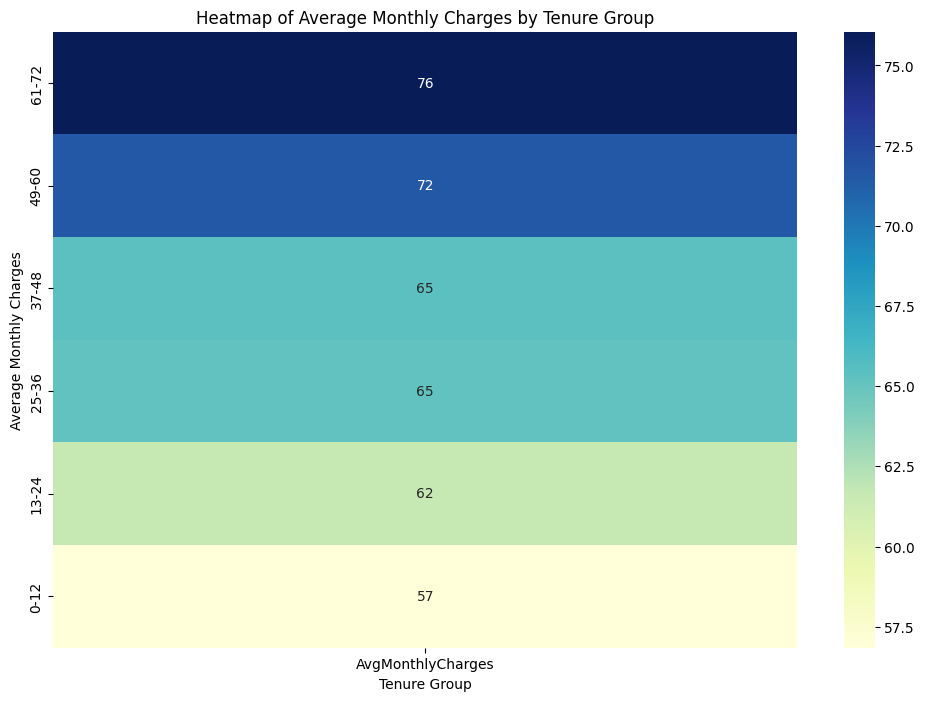

In [38]:
# Ensure there are no zero or missing values in 'tenure' to avoid division by zero
df_train_eda['tenure'].replace(0, 1, inplace=True)

# Create the 'AvgMonthlyCharges' feature (TotalCharges/tenure)
df_train_eda['AvgMonthlyCharges'] = df_train_eda['TotalCharges'] / df_train_eda['tenure']

# Copy the DataFrame
df_train_eda1 = df_train_eda.copy()

# Create tenure groups
df_train_eda1['tenure_group'] = pd.cut(df_train_eda1['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Create a pivot table for the heatmap
pivot_table = df_train_eda1.pivot_table(values='AvgMonthlyCharges', index='tenure_group', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Heatmap of Average Monthly Charges by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Average Monthly Charges')
plt.gca().invert_yaxis()
plt.show()

- Customers in the early tenure groups (0-12 and 13-24 months) are at higher risk of churn, possibly due to lower perceived value in the services for the cost they are incurring.

- Mid-tenure groups (25-36 and 37-48 months) show stability in charges, which may indicate a balanced relationship with the service provider, reducing churn risk.

- Long-tenure groups (49-60 and 61-72 months) with higher average monthly charges demonstrate strong customer loyalty and a lower risk of churn, as they likely perceive significant value in the services provided.

**6. How does the ratio of monthly charges to total charges vary across different customer tenures?**

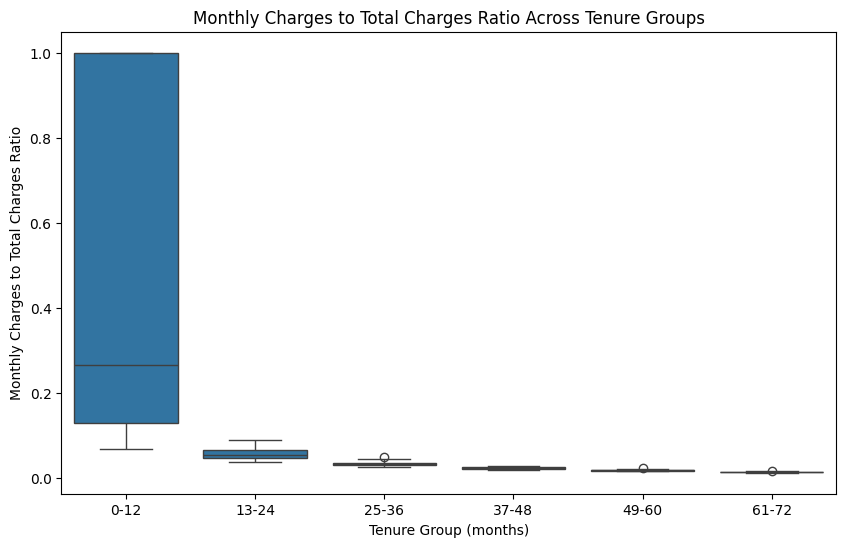

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no zero or missing values in 'TotalCharges' to avoid division by zero
df_train_eda['TotalCharges'].replace(0, 1, inplace=True)

# Create the 'MonthlyChargesToTotalChargesRatio' feature (MonthlyCharges/TotalCharges)
df_train_eda['MonthlyChargesToTotalChargesRatio'] = df_train_eda['MonthlyCharges'] / df_train_eda['TotalCharges']

# Copy the newly created feature to df_train_eda1
df_train_eda1['MonthlyChargesToTotalChargesRatio'] = df_train_eda['MonthlyChargesToTotalChargesRatio']

# Box plot of MonthlyChargesToTotalChargesRatio for different tenure groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure_group', y='MonthlyChargesToTotalChargesRatio', data=df_train_eda1)
plt.title('Monthly Charges to Total Charges Ratio Across Tenure Groups')
plt.xlabel('Tenure Group (months)')
plt.ylabel('Monthly Charges to Total Charges Ratio')
plt.show()

- Higher churn risk: Customers in the 0-12 months group, with high ratios and wide IQR, are more likely to churn. They are new and might not have found sufficient value in the services yet.

- Moderate churn risk: Customers in the 13-24 months group show more stability but still might churn if they do not perceive long-term value.

- Lower churn risk: Customers in the 25-36, 37-48, 49-60, and 61-72 months groups have very low ratios and minimal variation, indicating strong commitment and satisfaction with the services, thereby showing the lowest likelihood of churn.

#### Exporting Data

In [40]:
# Export the DataFrame to an Excel file
output_file = '../Data/LP2_train_final.xlsx'
df_train_eda.to_excel(output_file, index=False)

### Hypothesis Testing

Null Hypothesis (H<sub>0</sub>):  
There is no statistical significant relationship between churn rate and the contract term of the customer

Alternative Hypothesis (H<sub>1</sub>):  
There is a statistical significance relationship between churn rate and the contract term of the customer

#### Stacked Bar Chart of Churn Rates by Contract Type

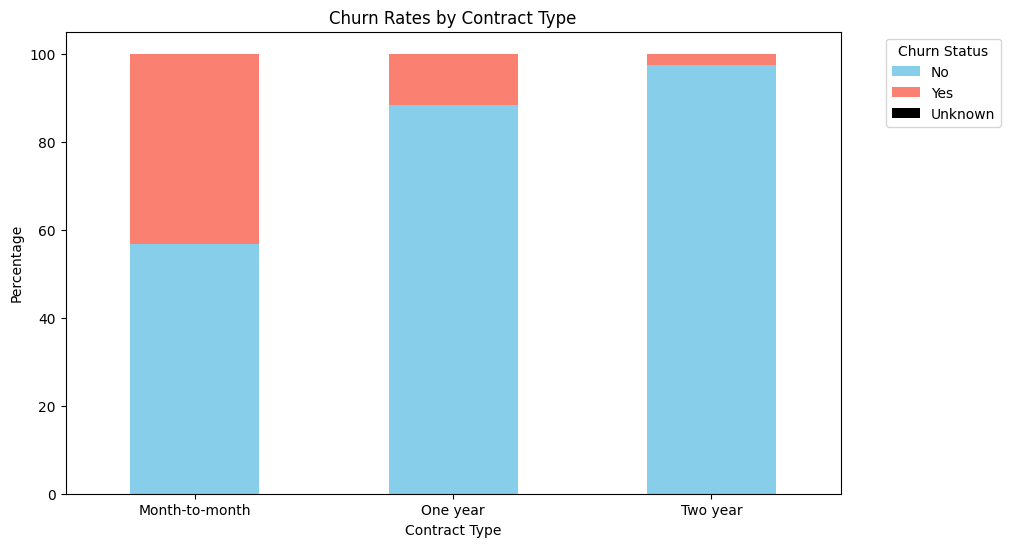

Churn,No,Yes,Unknown
Contract,,,
Month-to-month,56.851312,43.148688,0.000000
One year,88.436019,11.563981,0.000000
Two year,97.508039,2.411576,0.080386


In [41]:
# Group the data by 'Contract' and 'Churn' and count occurrences of 'Churn'
grouped_data = df_train_eda.groupby(['Contract', 'Churn'])['Churn'].count().rename('Breakdowm').reset_index()

# Calculate the percentage ratio of churn within each contract type
grouped_data['Ratio'] = grouped_data.groupby('Contract')['Breakdowm'].transform(lambda x: x / x.sum() * 100)

# Create a pivot table for easier plotting, filling NaN values with 0
pivot_data = grouped_data.pivot(index='Contract', columns='Churn', values='Ratio').fillna(0)

# Reindex the pivot table columns to ensure the order is 'No', 'Yes', 'Unknown'
desired_order = ['No', 'Yes', 'Unknown']
pivot_data = pivot_data.reindex(columns=desired_order)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'black'])
plt.title('Churn Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Display the pivot data
pivot_data

#### Logistic Regression Test to Validate Contract Type as an Important Feature for Testing the Null Hypothesis

In [42]:
# # Create a copy of the original DataFrame
df_train_lgr = df_train_eda.copy()

# Drop the row with the unknown value from the Churn Column
df_train_lgr.drop(index=2988, inplace=True)
df_train_lgr.reset_index(drop=True, inplace=True)
df_train_lgr.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
df_train_lgr['Churn'] = df_train_lgr['Churn'].map({'Yes': 1, 'No': 0})

# Replace invalid TotalCharges with NaN
df_train_lgr['TotalCharges'] = pd.to_numeric(df_train_lgr['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns_lgr = df_train_lgr.select_dtypes(include=['number']).columns
cat_columns_lgr = df_train_lgr.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_lgr[num_columns_lgr] = imputer_num.fit_transform(df_train_lgr[num_columns_lgr])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_lgr[cat_columns_lgr] = imputer_cat.fit_transform(df_train_lgr[cat_columns_lgr])

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols  = encoder.fit_transform(df_train_lgr[cat_columns_lgr])

# Create a DataFrame with the encoded column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_columns_lgr))

# Drop the original categorical columns
df_train_lgr = df_train_lgr.drop(cat_columns_lgr, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df_train_lgr = pd.concat([df_train_lgr, encoded_df], axis=1)

# df_train_lgr = pd.get_dummies(df_train_lgr, columns=cat_columns_lgr, drop_first=True)

df_train_lgr

,tenure,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges,MonthlyChargesToTotalChargesRatio,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Unknown,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Unknown,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Unknown,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Unknown,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Unknown,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Unknown,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.850000,29.850000,0.0,29.850000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34.0,56.950001,1889.500000,0.0,55.573529,0.030140,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,53.849998,108.150002,1.0,54.075001,0.497920,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45.0,42.299999,1840.750000,0.0,40.905556,0.022980,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.0,70.699997,151.649994,1.0,75.824997,0.466205,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,24.0,84.800000,1990.500000,0.0,82.937500,0.042602,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5038,72.0,103.200000,7362.900000,0.0,102.262500,0.014016,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
5039,11.0,29.600000,346.450000,0.0,31.495455,0.085438,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5040,4.0,74.400000,306.600000,1.0,76.650000,0.242661,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [43]:
# # Create a copy of the original DataFrame
df_train_lr = df_train_eda.copy()

# Drop the row with the unknown value from the Churn Column
df_train_lr.drop(index=2988, inplace=True)
df_train_lr.reset_index(drop=True, inplace=True)
df_train_lr.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
df_train_lr['Churn'] = df_train_lr['Churn'].map({'Yes': 1, 'No': 0})

# Replace invalid TotalCharges with NaN
df_train_lr['TotalCharges'] = pd.to_numeric(df_train_lr['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns_lr = df_train_lr.select_dtypes(include=['number']).columns
cat_columns_lr = df_train_lr.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_lr[num_columns_lr] = imputer_num.fit_transform(df_train_lr[num_columns_lr])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_lr[cat_columns_lr] = imputer_cat.fit_transform(df_train_lr[cat_columns_lr])

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols  = encoder.fit_transform(df_train_lr[cat_columns_lr])

# Create a DataFrame with the encoded column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_columns_lr))

# Drop the original categorical columns
df_train_lr = df_train_lr.drop(cat_columns_lr, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df_train_lr = pd.concat([df_train_lr, encoded_df], axis=1)

# Define features and targets
X = df_train_lr.drop(columns=['Churn'], axis=1)
y = df_train_lr['Churn']

# Ensure the dataset is not empty
if X.empty or y.empty:
    raise ValueError("The dataset is empty after preprocessing. Please check the data loading and preprocessing steps.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for sufficient training samples
if X_train.shape[0] == 0:
    raise ValueError("The resulting train set is empty. Adjust the parameters or check the dataset.")

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.DataFrame({"Feature_Prefix": X_train.columns, "Coefficient": logreg.coef_[0]})
feature_importances["Feature"] = feature_importances["Feature_Prefix"].str.split("_").str[0]

# Group by Prefix and calculate mean Importance
grouped_importances = feature_importances.groupby("Feature")["Coefficient"].mean().abs().round(4).sort_values(ascending=False)

# Print selected Features using Logistic Regression Coefficients
print()
print("Top Five Features using Logistic Regression Coefficients:")
print()
print(grouped_importances.head())


Top Five Features using Logistic Regression Coefficients:

Feature
MonthlyChargesToTotalChargesRatio    1.3973
Contract                             1.1745
PhoneService                         0.7565
InternetService                      0.3876
PaperlessBilling                     0.3351
Name: Coefficient, dtype: float64


#### Chi-Square Test of Independence to Test the Null Hypothesis

In [44]:
# Create a copy of the original DataFrame
df_train_chi = df_train_eda.copy()

# Drop the row with the unknown value from the Churn Column
df_train_chi.drop(index=2988, inplace=True)
df_train_chi.reset_index(drop=True, inplace=True)
df_train_chi.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
df_train_chi['Churn'] = df_train_chi['Churn'].map({'Yes': 1, 'No': 0})

# Replace invalid TotalCharges with NaN
df_train_chi['TotalCharges'] = pd.to_numeric(df_train_chi['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns = df_train_chi.select_dtypes(include=['number']).columns
cat_columns = df_train_chi.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_chi[num_columns] = imputer_num.fit_transform(df_train_chi[num_columns])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_chi[cat_columns] = imputer_cat.fit_transform(df_train_chi[cat_columns])

# Create contingency table
contingency_table = pd.crosstab(df_train_chi['Churn'], df_train_chi['Contract'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test")
print("----------------")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Test
----------------
Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192
Degrees of Freedom: 2


- **Interpretation of Chi-Square Test Results**

  1. **Chi-Square Statistic:** The Chi-Square statistic of 882.09 is a measure of how much the observed counts deviate from the expected counts under the null hypothesis (that 'Churn' and 'Contract' are independent).

  2. **P-value:** The p-value is extremely small, much smaller than any conventional significance level (e.g., 0.05, 0.01). This indicates a very strong evidence against the null hypothesis.

  3. **Degrees of Freedom:** The degrees of freedom (df) for the test is 2 which confirms the three contract levels (Month-to-Month, One year, Two year).

- **Conclusion**

  - **Strong Association:** The extremely low p-value suggests a very strong association between 'Churn' and 'Contract'. This means that the type of contract a customer has is significantly related to whether they churn or not.
    
  - **Significant Result:** Given the very low p-value, we reject the null hypothesis of independence. There is a statistically significant relationship between 'Churn' and 'Contract' types.
    
  - **Practical Implication:** The results imply that customer churn rates vary significantly with different types of contracts. This information can be valuable for developing strategies to reduce churn by focusing on specific contract types that are more likely associated with higher churn rates.

### Key Insights
- Both df_3000 & df_2000 have the same number of columns
- Both df_3000 & df_2000 have the same column names
- df_3000 and df_2000 combined to one dataframe as df_train
- A copy of the original dataset has been created as df_train_eda and used for the EDA
- Convert the TotalCharges column to float and SeniorCitizen back to boolean dtype
- There are 6 columns which contains over 12% of missing values with one other column containing 5.3% of missing values
- There are no duplicated values in the df_train dataset
- A view of the unique values of the columns indicates irregular boolean dtype ie:['PhoneService'] has 4 unique values [False True 'Yes' 'No']
- Applied a standardization function to rectify the irregular boolean dtypes for the following: ('Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen')
- The most frequent values observed by columns are as follows: Male['gender'], Fiber optic['InternetService'], Month-to-month['Contract'] & Electronic check['PaymentMethod']
- For ease of analysis, the features segmented as follows:

  **target = Churn** The target variable

  **subscriber_account_numerical = [tenure, MonthlyCharges, TotalCharges]** 

  **subscriber_account_categorical = [Contract, PaperlessBilling, PaymentMethod, customerID]**
  
  **subscriber_demographic = [gender, Partner, SeniorCitizen, Dependents]**

  **subscribtions = [PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies]**
                                                            
- The Churn rate is 26.5%
- For the Subscriber Account segment, distribution of ['Contract'], 54% are month-to-month and the rest of the 46% are almost evenly split between the annual & two years contracts
- The Churn rate for the month-to-month contract is 23.5% in relation to the other contract types and is quite close to the Telco Churn rate of 26.5%
- The Churn rate for the Subscription are as follows: ['TechSupport'] = 4.4%(lowest), ['PhoneService'] = 24%, Fiber optic['InternetService']=18%
 ['StreamingTV'] = 11%, ['StreamingMovies'] = 12%, which is very similar.
- For the Distribution of ['PaymentMethod'], Electronic check['PaymentMethod'] has the highest Churn rate of 44% followed by Mailed check['PaymentMethod'] & Bank transfer (automatic)['PaymentMethod']
- The Churn rate for Subscriber Demographics are as follows: ['gender'] both Males and Females are the same approximately 13%, and those with ['Partners'] Churn at 9.8% versus those without Churn at 16%
- The Subscriber numerical features are not normally distributed
- Dataset is not balanced
- The churn effect of TotalCharges appears to correlate with the effect of tenure (strong) and MonthlyCharges (moderate).
- There are a high number of high outliers for the total charges of people that churned compared to does that did not.
- There are noticeable high outliers for the tenure of females that churn.
- `Customer churn rates vary significantly with different types of contracts. This information can be valuable for developing strategies to reduce churn by focusing on specific contract types that are more likely associated with higher churn rates.`

[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Split data set into X and y`

`Split data set into training and evaluation`

`Feature Engineering (Craeting New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, Normalization, Scaling)`
- Create a pipeline to preprocess the data

- Separate inpute features into numeric and categorical for different pipelines

- Handle missing values using imputation Techniques Use sklearn.impute.SimpleImputer

- Scaling or normalize numeric features: Use sklearn.preprocessing.StandardScaler to scale the numerical features

- Encode categorical features: Use OneHotEncoder to encode categorical features

- Transformations for skewed data (log, power, custom, etc)
    
- Balance dataset (depending on what you see): Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here:       https://imbalanced-learn.org/stable/install.html

`Features Creation`

### Split Dataset into Input and Output (X, y)

In [47]:
# Copy df_train_eda
df_train_model = df_train_eda.copy()

# Drop missing values from Churn Column
df_train_model.drop(index=2988, inplace=True)

# Reset the index of the Dataframe
df_train_model.reset_index(drop=True, inplace=True)

# Identify object columns to convert to category datatype
object_columns_to_convert = [col for col in df_train_model.select_dtypes(include=['object']).columns]
 
# Convert object columns to category datatype
df_train_model[object_columns_to_convert] = df_train_model[object_columns_to_convert].astype('category')

# Display DataFrame information with deep memory usage
df_train_model.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customerID                         5042 non-null   category
 1   gender                             5042 non-null   category
 2   SeniorCitizen                      5042 non-null   category
 3   Partner                            5042 non-null   category
 4   Dependents                         5042 non-null   category
 5   tenure                             5042 non-null   int64   
 6   PhoneService                       5042 non-null   category
 7   MultipleLines                      5042 non-null   category
 8   InternetService                    5042 non-null   category
 9   OnlineSecurity                     5042 non-null   category
 10  OnlineBackup                       5042 non-null   category
 11  DeviceProtection                   5042 non

In [49]:
# View the unique values of the Churn column
df_train_model['Churn'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [50]:
# View the shape of the dataframe
df_train_model.shape

(5042, 23)

In [51]:
# Split data into features and target
X = df_train_model.drop('Churn', axis=1)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgMonthlyCharges,MonthlyChargesToTotalChargesRatio
0,7590-VHVEG,Female,No,Yes,No,1,No,Unknown,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,29.850000,1.000000
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,55.573529,0.030140
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,54.075001,0.497920
3,7795-CFOCW,Male,No,No,No,45,No,Unknown,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,40.905556,0.022980
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,75.824997,0.466205


In [52]:
y = df_train_model['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']

In [53]:
y.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [54]:
X.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges',
       'MonthlyChargesToTotalChargesRatio'],
      dtype='object')

### Split data set into training and evaluation

In [55]:
# Separate numeric and categorical columns
num_columns = X.select_dtypes('number').columns
cat_columns = X.select_dtypes('category').columns

In [56]:
# Preview the separated numeric columns
num_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges',
       'MonthlyChargesToTotalChargesRatio'],
      dtype='object')

In [57]:
# Preview the categorical columns
cat_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customerID                         5042 non-null   category
 1   gender                             5042 non-null   category
 2   SeniorCitizen                      5042 non-null   category
 3   Partner                            5042 non-null   category
 4   Dependents                         5042 non-null   category
 5   tenure                             5042 non-null   int64   
 6   PhoneService                       5042 non-null   category
 7   MultipleLines                      5042 non-null   category
 8   InternetService                    5042 non-null   category
 9   OnlineSecurity                     5042 non-null   category
 10  OnlineBackup                       5042 non-null   category
 11  DeviceProtection                   5042 non

In [59]:
# Preview the counts of the target columns
y.value_counts()

Churn
No     3706
Yes    1336
Name: count, dtype: int64

In [60]:
y.isnull().sum()

0

In [61]:
# Initialize an encoder with the training data and evaluation data
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# Split data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Preview the splitted training and evaluation
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((4033, 20), (4033,), (1009, 20), (1009,))

In [ ]:
# # Initialize an encoder with the training data and evaluation data
# encoder = LabelEncoder()
# y_train_encoded = encoder.fit_transform(y_train)
# y_eval_encoded = encoder.transform(y_eval)

In [ ]:
for col in num_columns:
    skewness = round(X[col].skew(), 2)
    kurtosis = round(X[col].kurtosis(), 2)
    print(f"The skewness of '{col}': {skewness} and kurtosis: {kurtosis}")

The skewness of 'tenure': 0.23 and kurtosis: -1.39
The skewness of 'MonthlyCharges': -0.24 and kurtosis: -1.25
The skewness of 'TotalCharges': 0.94 and kurtosis: -0.28


### Pipeline

In [ ]:
# View summary statistics
X.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5042.0,32.568822,24.525954,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.400000,35.762500,70.550003,90.050002,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


In [ ]:
# Initialize a Scaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(X.select_dtypes(include=['number']))
scaled_data

array([[-0.59574468, -0.7497122 , -0.39825004],
       [ 0.10638298, -0.25051811,  0.14188466],
       [-0.57446809, -0.30762153, -0.37550784],
       ...,
       [-0.38297872, -0.75431731, -0.30629368],
       [-0.53191489,  0.07091866, -0.3178681 ],
       [ 0.78723404,  0.64655759,  1.58106269]])

In [ ]:
# Create a Data Preprocessing Pipeline for all the numerical variables
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('rob', RobustScaler()),
    ('power-transformation', PowerTransformer(method='yeo-johnson'))])

# Create a Data Preprocessing Pipeline for all the categorical variables
cat_pipe = Pipeline(steps=[
    ('Cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('rob', RobustScaler()),
                                                 ('power-transformation',
                                                  PowerTransformer())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('Cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

### Feature Engineering

- **Univariate Feature Selection with Chi-Squared Test of Indpendence**

- **Logistic Regression Test**

- **Univariate Feature Selection with Mutual Information Classification**

- **Feature Importance from Random Forest**

- **Recursive Feature Elimination with Random Forest**

- **Pearson Correlation Matrix Test**

    To incorporate a feature into the modeling process, it undergoes rigorous evaluation against predefined criteria. A feature must meet the criteria outlined in the decision table across all three parameters to be considered for inclusion in the model. Furthermore, any feature demonstrating affirmative outcomes in both the chi-square independence test and the logistic regression test is also deemed suitable for incorporation.

[Back to Top](#Table-of-Contents)

## Step 4: Modeling and Evaluation

`Fit data to the pipeline and train Model`

- Train Model 1 - Distance based model

- Train Model 2 - Gradient Descent model

- Train Model 3 - Tree based model

- Train Model 4 - Neural Network

**Fit data to the pipeline and train Model**

In [ ]:
# Define oversampling technique
over_sampler = SMOTE(random_state=42)

In [ ]:
# Define the models
models = [
('KNN', KNeighborsClassifier()),
('LR', LogisticRegression(random_state=42)),
('RF', RandomForestClassifier(random_state=42)),
('SVC', SVC(random_state=42, probability=True)),
]

In [ ]:
# # Train and evaluate the models
# results = {}

In [ ]:
# Define target names for classification report
target_names = ["No", "Yes"]

# Initialize results dictionary
results = {}

# Evaluate the models above using the roc_auc_score
for model_name, classifier in models:
    print(f"Training {model_name} model...")
    
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('sampler', over_sampler),
        ('model', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Save the model to disk
    joblib.dump(pipeline, f'{model_name}_model.joblib')
    
    # Transform the evaluation data using only the preprocessor part of the pipeline
    X_eval_preprocessed = pipeline.named_steps['preprocessor'].transform(X_eval)
    
    # Predict on the evaluation data
    y_pred = pipeline.named_steps['model'].predict(X_eval_preprocessed)
    
    # Calculate ROC AUC Score
    if hasattr(pipeline.named_steps['model'], 'predict_proba'):
        y_prob = pipeline.named_steps['model'].predict_proba(X_eval_preprocessed)
        # Calculate ROC AUC Score for binary or multi-class classification
        if len(np.unique(y_train)) > 2:
            roc_auc = roc_auc_score(y_eval, y_prob, multi_class='ovr')
        else:
            roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
    elif hasattr(pipeline.named_steps['model'], 'decision_function'):
        y_prob = pipeline.named_steps['model'].decision_function(X_eval_preprocessed)
        # Calculate ROC AUC Score for binary or multi-class classification
        if len(np.unique(y_train)) > 2:
            roc_auc = roc_auc_score(y_eval, y_prob, multi_class='ovr')
        else:
            roc_auc = roc_auc_score(y_eval, y_prob)
    else:
        print(f"{model_name} model does not support probability prediction.")
        continue

    # Store the results
    results[model_name] = {
        'Classification Report': classification_report(y_eval, y_pred, output_dict=True),
        'ROC AUC Score': roc_auc,
        'Predictions': y_pred
    }

    # Print the classification report
    print(f"\n{model_name} Model Evaluation:\n")
    print(classification_report(y_eval, y_pred, target_names=target_names))
    print(f"ROC AUC Score: {roc_auc}\n")

# Display the pipeline
pipeline


Training KNN model...

KNN Model Evaluation:

              precision    recall  f1-score   support

          No       0.91      0.59      0.72       742
         Yes       0.43      0.84      0.56       267

    accuracy                           0.66      1009
   macro avg       0.67      0.71      0.64      1009
weighted avg       0.78      0.66      0.68      1009

ROC AUC Score: 0.7766639409632836

Training LR model...

LR Model Evaluation:

              precision    recall  f1-score   support

          No       0.89      0.80      0.84       742
         Yes       0.57      0.73      0.64       267

    accuracy                           0.78      1009
   macro avg       0.73      0.77      0.74      1009
weighted avg       0.81      0.78      0.79      1009

ROC AUC Score: 0.8523072574376369

Training RF model...

RF Model Evaluation:

              precision    recall  f1-score   support

          No       0.85      0.88      0.86       742
         Yes       0.62      0.55

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('on...
                                                  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('sampler', SMOTE(random_state=42)),
                ('model', SVC(probability=True, random_state=42))])

`Comment`

**Importance for Churn Rate**  
In the context of customer churn, recall is generally more important than precision. This is because:

- **High Recall:** Ensures that most of the actual churners are correctly identified, minimizing the number of false negatives (customers who churn but were not predicted to churn). Missing a churner can be costly as it means losing a customer without any intervention.
  
- **Precision:** While precision ensures that the predicted churners are mostly actual churners, a lower precision (higher false positives) can be tolerated because intervening with non-churners might incur some cost but does not result in customer loss.

- **Choosing the Right Metric:**
For imbalanced datasets, F1 Score and Weighted Accuracy are generally more reliable metrics. The F1 Score focuses on the performance of the minority class by balancing precision and recall, while Weighted Accuracy provides an overall performance measure that accounts for the distribution of classes.

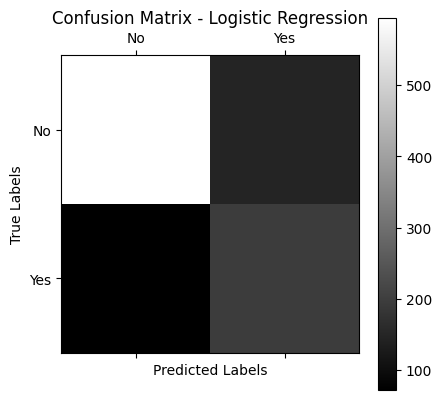

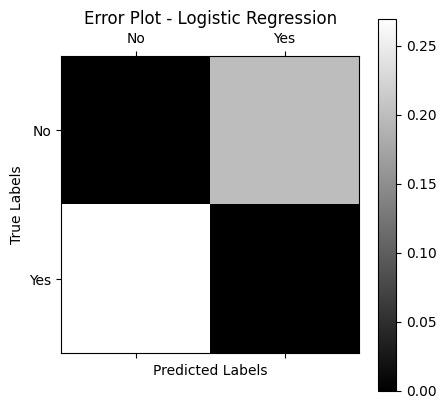

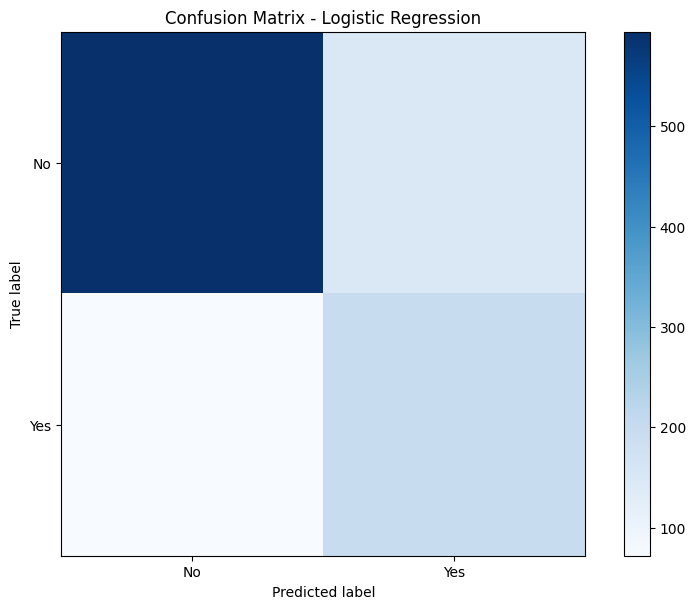

In [ ]:
# Retrieve predictions and true labels for the logistic regression model
y_pred_plot = results['LR']['Predictions']  
y_true_plot = y_eval

# Compute confusion matrix
cm = confusion_matrix(y_true_plot, y_pred_plot)

# Compute normalized confusion matrix (as a percentage of true class)
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

# Fill diagonal with zeros for better visualization of errors
np.fill_diagonal(norm_cm, 0)  

# Plot raw confusion matrix for the logistic regression model
plt.matshow(cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(target_names)), target_names)
plt.yticks(np.arange(len(target_names)), target_names)
plt.colorbar()
plt.show()

# Plot normalized confusion matrix for the logistic regression model (error plot)
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.title("Error Plot - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(target_names)), target_names)
plt.yticks(np.arange(len(target_names)), target_names)
plt.colorbar()
plt.show()

# Alternative plot using imshow for the confusion matrix with better visualization
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()

# Adding labels to the plot
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
# Find the Logistic Regression model by indexing
lr_model = None
for name, model in models:
    if name == 'LR':
        lr_model = model
        break

# Create the pipeline for Logistic Regression
lr_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), 
    ('sampler', over_sampler),
    ('model', lr_model)  
])

# Display the pipeline
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('on...
                                                  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('sampler', SMOTE(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalties
    'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Inverse of regularization strength
    'model__solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers to use
    'model__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Setup GridSearchCV for F1 score
grid_search_f1 = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Perform GridSearchCV for F1 score
print("Starting GridSearchCV for Logistic Regression - F1 Score...")
grid_search_f1.fit(X_train, y_train)

# Print the best parameters and best score for F1 score
print(f"\nBest parameters found for F1 score: {grid_search_f1.best_params_}")
print(f"\nBest cross-validation F1 score: {grid_search_f1.best_score_:.4f}")

# Access the best estimator (pipeline with the best parameters) for F1 score
best_pipeline_f1 = grid_search_f1.best_estimator_

# Setup GridSearchCV for ROC AUC score
grid_search_roc_auc = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Perform GridSearchCV for ROC AUC score
print("\nStarting GridSearchCV for Logistic Regression - ROC AUC Score...")
grid_search_roc_auc.fit(X_train, y_train)

# Print the best parameters and best score for ROC AUC score
print(f"\nBest parameters found for ROC AUC score: {grid_search_roc_auc.best_params_}")
print(f"\nBest cross-validation ROC AUC score: {grid_search_roc_auc.best_score_:.4f}")

# Access the best estimator (pipeline with the best parameters) for ROC AUC score
best_pipeline_roc_auc = grid_search_roc_auc.best_estimator_

# Save the best models to disk
joblib.dump(best_pipeline_f1, 'best_logistic_regression_model_f1.joblib')
joblib.dump(best_pipeline_roc_auc, 'best_logistic_regression_model_roc_auc.joblib')

Starting GridSearchCV for Logistic Regression - F1 Score...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best parameters found for F1 score: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

Best cross-validation F1 score: 0.6355

Starting GridSearchCV for Logistic Regression - ROC AUC Score...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best parameters found for ROC AUC score: {'model__C': 1.0, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

Best cross-validation ROC AUC score: 0.8472


['best_logistic_regression_model_roc_auc.joblib']

In [ ]:
# Display the best models for F1 score
print("Best model for F1 score:\n") 
best_pipeline_f1.named_steps['model']

Best model for F1 score:



LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [ ]:
# Display the best model for ROC AUC score
print(f"Best model for ROC AUC score:\n")
best_pipeline_roc_auc.named_steps['model']

Best model for ROC AUC score:



LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [ ]:
# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Model Evaluation Results:")
    print(f"ROC AUC Score: {metrics['ROC AUC Score']}")
    for metric, score in metrics['Classification Report'].items():
        print(f"{metric}: {score}")

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Model Evaluation Results:")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")

[Back to Top](#Table-of-Contents)

## Step 6: Document the entire process in an article on medium